<a href="https://colab.research.google.com/github/Vijayalakshmitce/8-2-demo/blob/master/AIML_ML_Project_Full_Code_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Problem Statement

### Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

### Objective

To predict whether a liability customer will buy personal loans, to understand which customer attributes are most significant in driving purchases, and identify which segment of customers to target more.

### Data Dictionary
* `ID`: Customer ID
* `Age`: Customer’s age in completed years
* `Experience`: #years of professional experience
* `Income`: Annual income of the customer (in thousand dollars)
* `ZIP Code`: Home Address ZIP code.
* `Family`: the Family size of the customer
* `CCAvg`: Average spending on credit cards per month (in thousand dollars)
* `Education`: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* `Mortgage`: Value of house mortgage if any. (in thousand dollars)
* `Personal_Loan`: Did this customer accept the personal loan offered in the last campaign? (0: No, 1: Yes)
* `Securities_Account`: Does the customer have securities account with the bank? (0: No, 1: Yes)
* `CD_Account`: Does the customer have a certificate of deposit (CD) account with the bank? (0: No, 1: Yes)
* `Online`: Do customers use internet banking facilities? (0: No, 1: Yes)
* `CreditCard`: Does the customer use a credit card issued by any other Bank (excluding All life Bank)? (0: No, 1: Yes)

## Importing necessary libraries

In [1]:
# Installing the libraries with the specified version.
!pip install numpy==2.0.2 pandas==2.2.2 matplotlib==3.10.0 seaborn==0.13.2 scikit-learn==1.6.1 sklearn-pandas==2.2.0 -q --user

**Note**:

1. After running the above cell, kindly restart the notebook kernel (for Jupyter Notebook) or runtime (for Google Colab), write the relevant code for the project from the next cell, and run all cells sequentially from the next cell.

2. On executing the above line of code, you might see a warning regarding package dependencies. This error message can be ignored as the above code ensures that all necessary libraries and their dependencies are maintained to successfully execute the code in this notebook.

In [2]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Library to split data
from sklearn.model_selection import train_test_split

# To build model for prediction
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
)

# to suppress unnecessary warnings
import warnings
warnings.filterwarnings("ignore")

## Loading the dataset

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
Load = pd.read_csv('/content/drive/MyDrive/Loan_Modelling.csv')

In [5]:
data = Load.copy()

## Data Overview

* Observations
* Sanity checks

In [6]:
data.head(5)

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [7]:
data.tail(5)

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIPCode,5000.0,93169.257000,1759.455086,90005.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal_Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [10]:
data.isnull().sum()

,0
ID,0
Age,0
Experience,0
Income,0
ZIPCode,0
Family,0
CCAvg,0
Education,0
Mortgage,0
Personal_Loan,0


In [11]:
data.duplicated().sum()

np.int64(0)

In [12]:
data = data.drop('ID',axis=1)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   int64  
 2   Income              5000 non-null   int64  
 3   ZIPCode             5000 non-null   int64  
 4   Family              5000 non-null   int64  
 5   CCAvg               5000 non-null   float64
 6   Education           5000 non-null   int64  
 7   Mortgage            5000 non-null   int64  
 8   Personal_Loan       5000 non-null   int64  
 9   Securities_Account  5000 non-null   int64  
 10  CD_Account          5000 non-null   int64  
 11  Online              5000 non-null   int64  
 12  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(12)
memory usage: 507.9 KB


In [14]:
data['Experience'].unique()

array([ 1, 19, 15,  9,  8, 13, 27, 24, 10, 39,  5, 23, 32, 41, 30, 14, 18,
       21, 28, 31, 11, 16, 20, 35,  6, 25,  7, 12, 26, 37, 17,  2, 36, 29,
        3, 22, -1, 34,  0, 38, 40, 33,  4, -2, 42, -3, 43])

In [15]:
data[data['Experience'] < 0] ['Experience'].unique()

array([-1, -2, -3])

In [16]:
data["Experience"].replace({-1: 1, -2: 2, -3: 3}, inplace=True)

In [17]:
data['Experience'].unique()

array([ 1, 19, 15,  9,  8, 13, 27, 24, 10, 39,  5, 23, 32, 41, 30, 14, 18,
       21, 28, 31, 11, 16, 20, 35,  6, 25,  7, 12, 26, 37, 17,  2, 36, 29,
        3, 22, 34,  0, 38, 40, 33,  4, 42, 43])

In [18]:
data['ZIPCode'].nunique()

467

In [19]:
data["ZIPCode"] = data["ZIPCode"].astype(str)
data["ZIPCode"] = data["ZIPCode"].str[0:2]
data["ZIPCode"] = data["ZIPCode"].astype("category")

In [20]:
categoryColumn = [
    'Education',
    'Online',
    'Personal_Loan',
    'Securities_Account',
    'CD_Account',
    'CreditCard',
    'Mortgage'
]

In [21]:
data[categoryColumn] = data[categoryColumn].astype("category")


In [22]:
data.head()

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,25,1,49,91,4,1.6,1,0,0,1,0,0,0
1,45,19,34,90,3,1.5,1,0,0,1,0,0,0
2,39,15,11,94,1,1.0,1,0,0,0,0,0,0
3,35,9,100,94,1,2.7,2,0,0,0,0,0,0
4,35,8,45,91,4,1.0,2,0,0,0,0,0,1


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Age                 5000 non-null   int64   
 1   Experience          5000 non-null   int64   
 2   Income              5000 non-null   int64   
 3   ZIPCode             5000 non-null   category
 4   Family              5000 non-null   int64   
 5   CCAvg               5000 non-null   float64 
 6   Education           5000 non-null   category
 7   Mortgage            5000 non-null   category
 8   Personal_Loan       5000 non-null   category
 9   Securities_Account  5000 non-null   category
 10  CD_Account          5000 non-null   category
 11  Online              5000 non-null   category
 12  CreditCard          5000 non-null   category
dtypes: category(8), float64(1), int64(4)
memory usage: 251.3 KB


## Exploratory Data Analysis.

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?
2. How many customers have credit cards?
3. What are the attributes that have a strong correlation with the target attribute (personal loan)?
4. How does a customer's interest in purchasing a loan vary with their age?
5. How does a customer's interest in purchasing a loan vary with their education?

In [24]:
num_cols = data.select_dtypes(include=['number']).columns

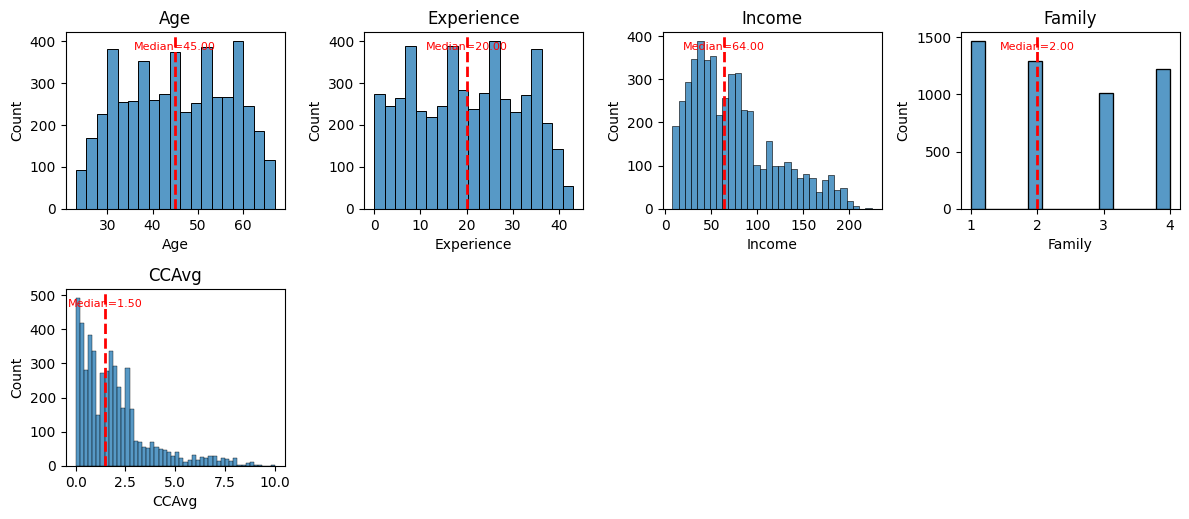

In [25]:
plt.figure(figsize=(12,10))
for i , feature in enumerate(num_cols):
  plt.subplot(4,4,i+1)
  sns.histplot(data,x=feature)
  median_val = data[feature].median()
  plt.axvline(median_val, color="red", linestyle="--", linewidth=2)
  plt.text(median_val, plt.ylim()[1]*0.9, f'Median={median_val:.2f}',
             color='red', ha='center', fontsize=8)
  plt.title(feature)
plt.tight_layout()

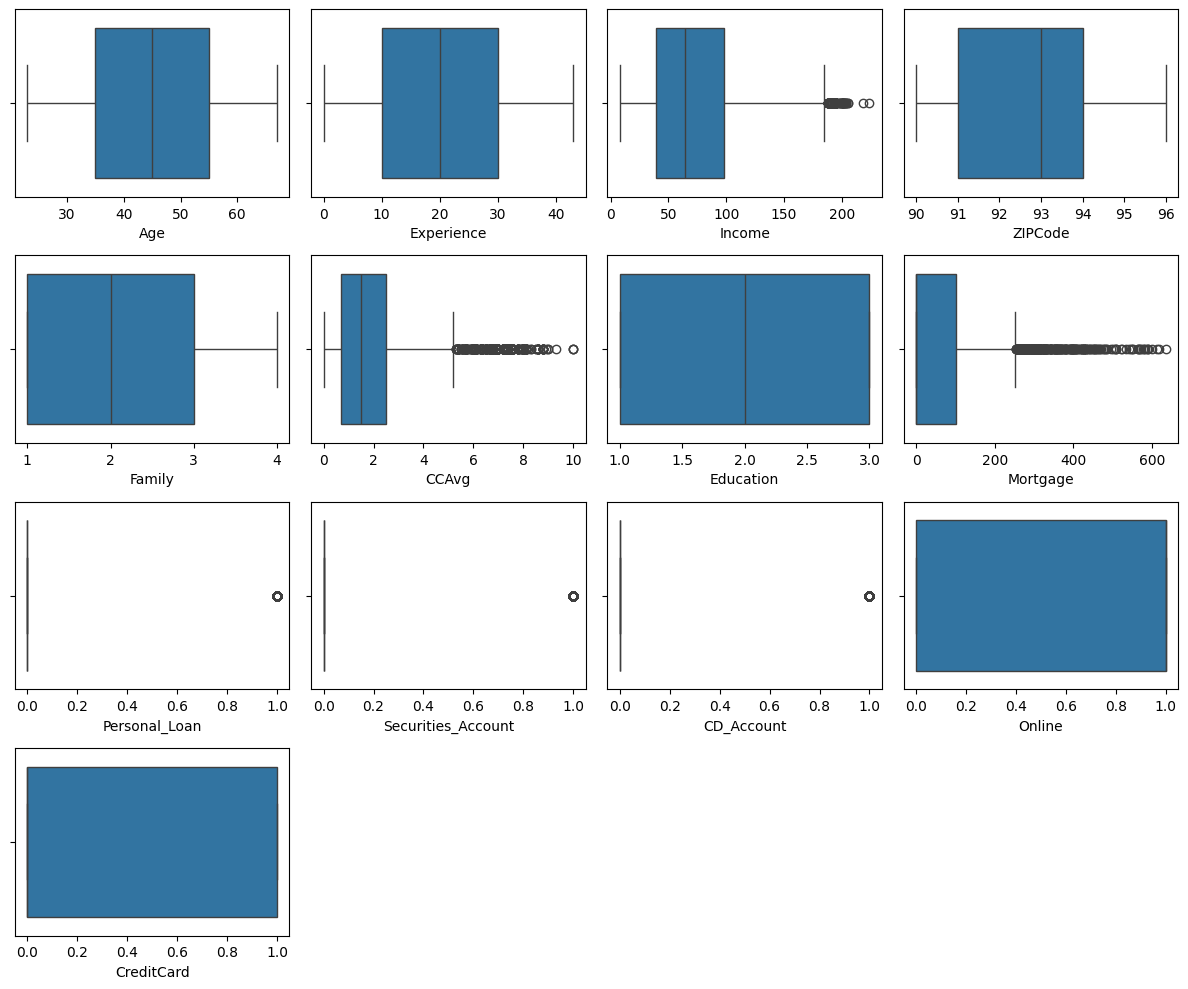

In [26]:
plt.figure(figsize=(12,10))
for i , feature in enumerate(data.columns):
  plt.subplot(4,4,i+1)
  sns.boxplot(data,x=feature)
plt.tight_layout()

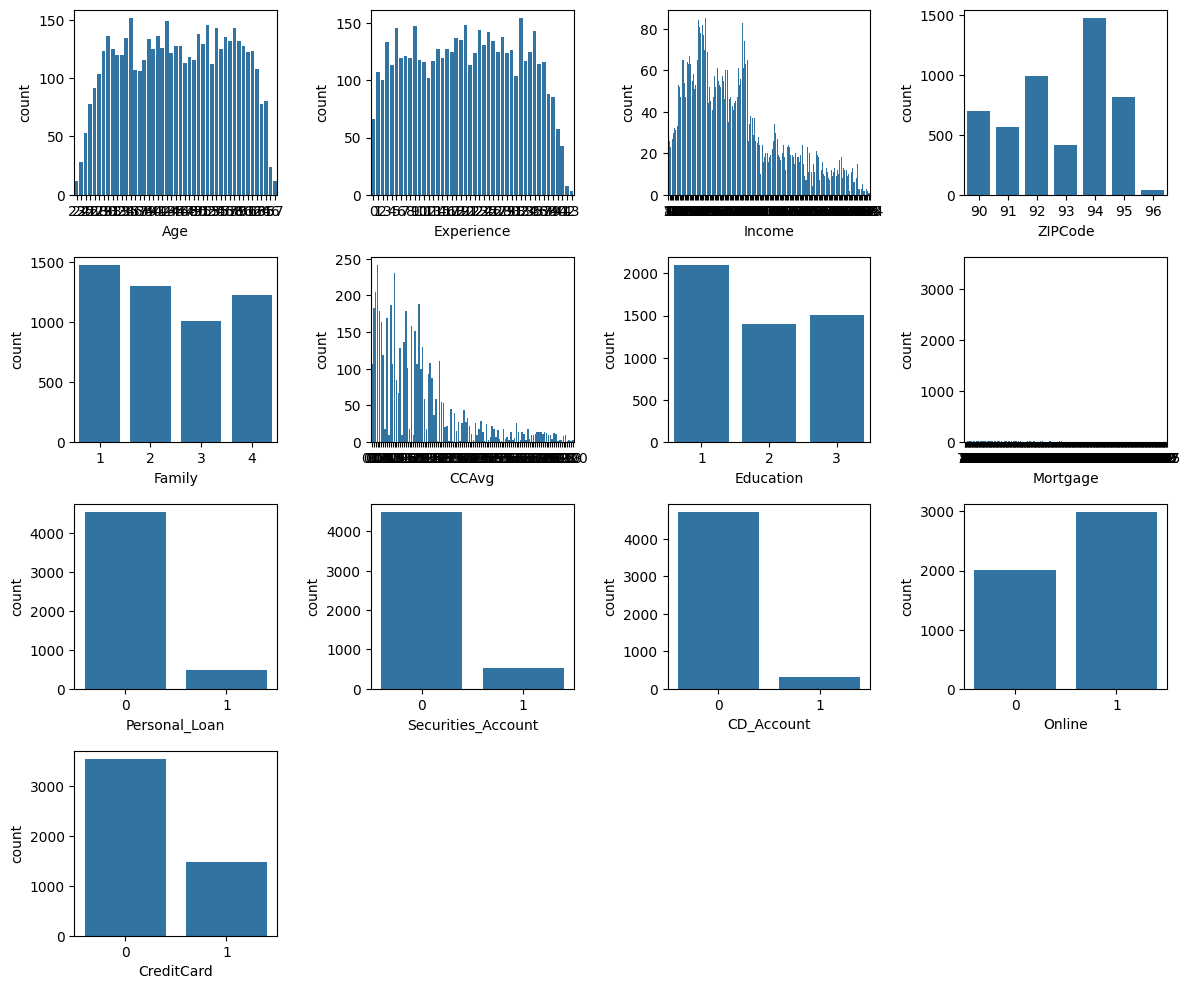

In [27]:
plt.figure(figsize=(12,10))
for i , feature in enumerate(data.columns):
  plt.subplot(4,4,i+1)
  sns.countplot(data,x=feature)
plt.tight_layout()

<Axes: >

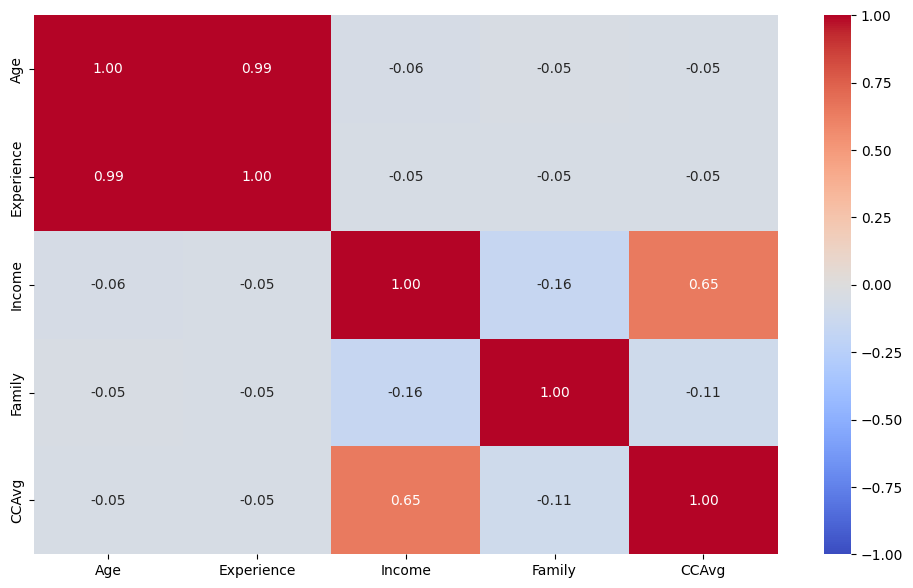

In [28]:
plt.figure(figsize=(12,7))
sns.heatmap(data.select_dtypes(include=['float64','int64']).corr(),annot=True,vmin=-1,vmax=1,fmt='.2f',cmap='coolwarm')

In [29]:
def stackedBarPlot (data,predictor,target):
  count = data[predictor].nunique()
  sorter = data[target].value_counts().index[-1]
  tab1 = pd.crosstab(data[predictor],data[target],margins=True).sort_values(by=sorter,ascending=False)
  tab = pd.crosstab(data[predictor],data[target],normalize='index').sort_values(by=sorter,ascending=False)
  tab.plot(kind='bar',stacked=True, figsize=(count + 5, 5))
  plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
  plt.tight_layout()
  plt.show()


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Age                 5000 non-null   int64   
 1   Experience          5000 non-null   int64   
 2   Income              5000 non-null   int64   
 3   ZIPCode             5000 non-null   category
 4   Family              5000 non-null   int64   
 5   CCAvg               5000 non-null   float64 
 6   Education           5000 non-null   category
 7   Mortgage            5000 non-null   category
 8   Personal_Loan       5000 non-null   category
 9   Securities_Account  5000 non-null   category
 10  CD_Account          5000 non-null   category
 11  Online              5000 non-null   category
 12  CreditCard          5000 non-null   category
dtypes: category(8), float64(1), int64(4)
memory usage: 251.3 KB


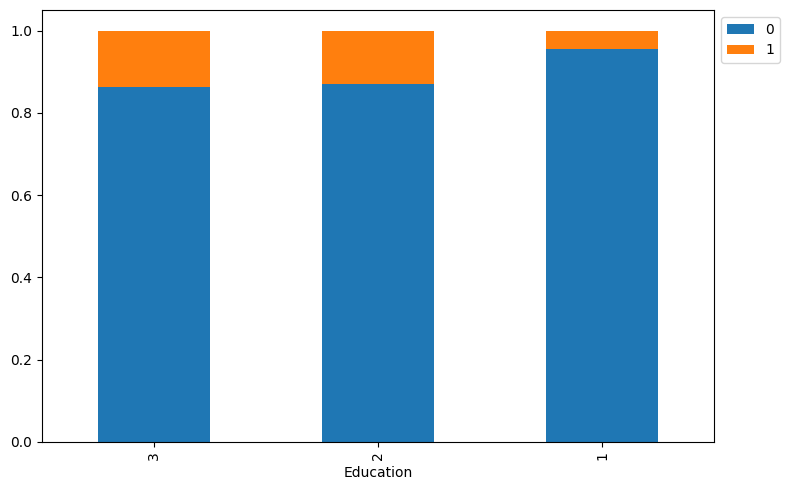

In [31]:
stackedBarPlot(data,"Education", "Personal_Loan")

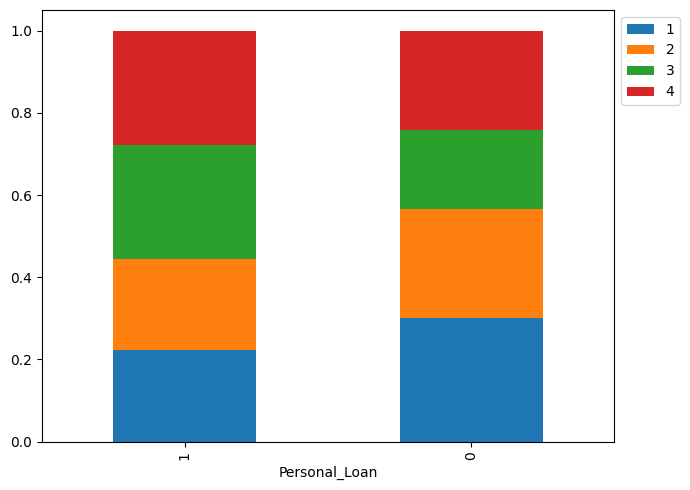

In [32]:
stackedBarPlot(data,"Personal_Loan",'Family')

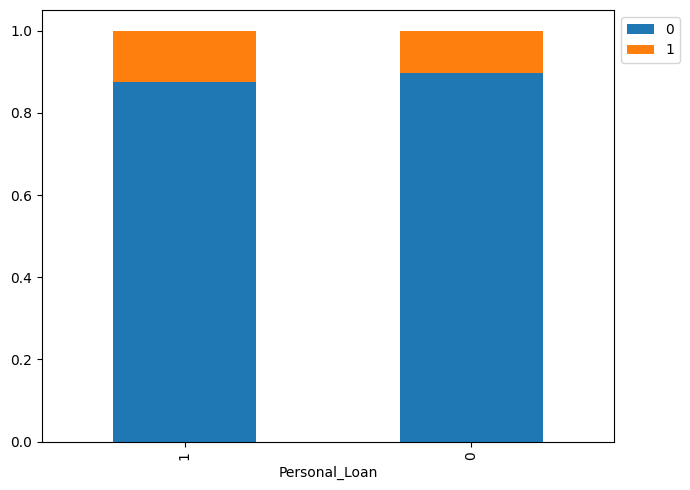

In [33]:
stackedBarPlot(data,"Personal_Loan",'Securities_Account')

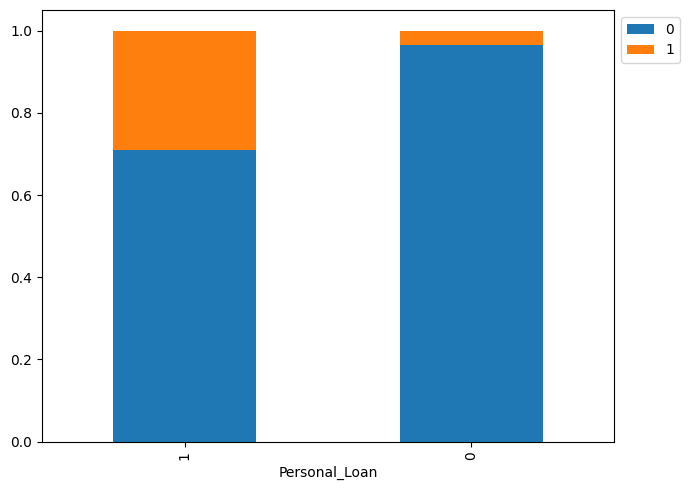

In [34]:
stackedBarPlot(data,"Personal_Loan",'CD_Account')

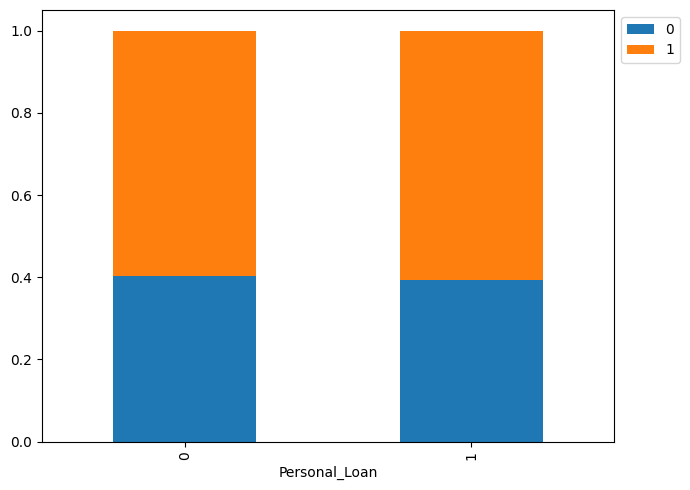

In [35]:
stackedBarPlot(data,"Personal_Loan",'Online')

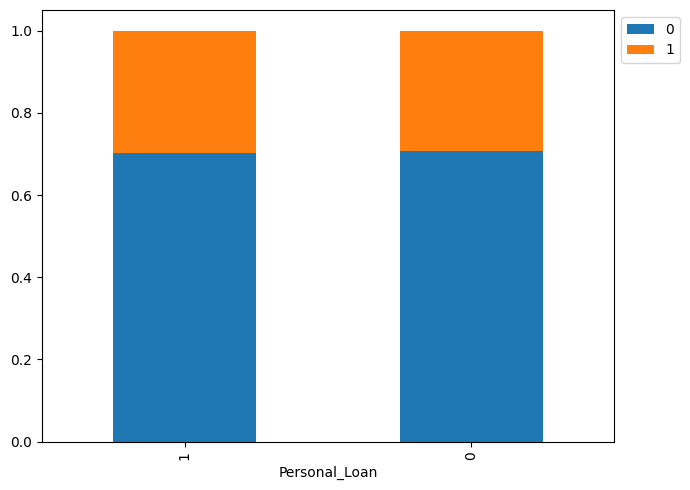

In [36]:
stackedBarPlot(data,"Personal_Loan",'CreditCard')

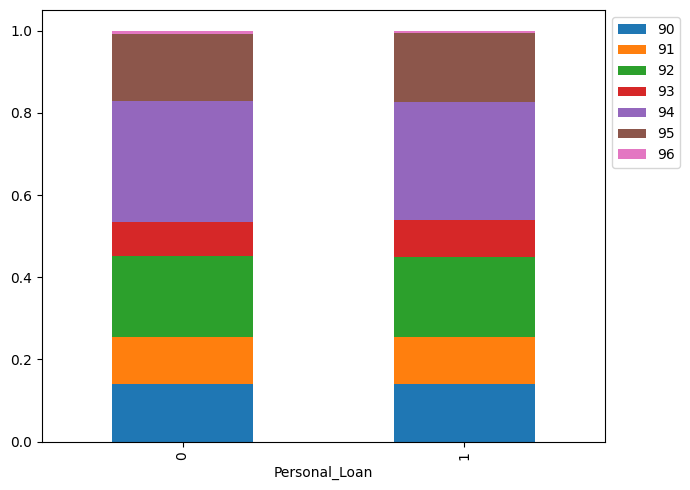

In [37]:
stackedBarPlot(data,"Personal_Loan",'ZIPCode')

In [38]:
def boxplotTargetPredictor(data, predictor, target):
    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="blue",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="red",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="Greens",
    )

    plt.tight_layout()
    plt.show()



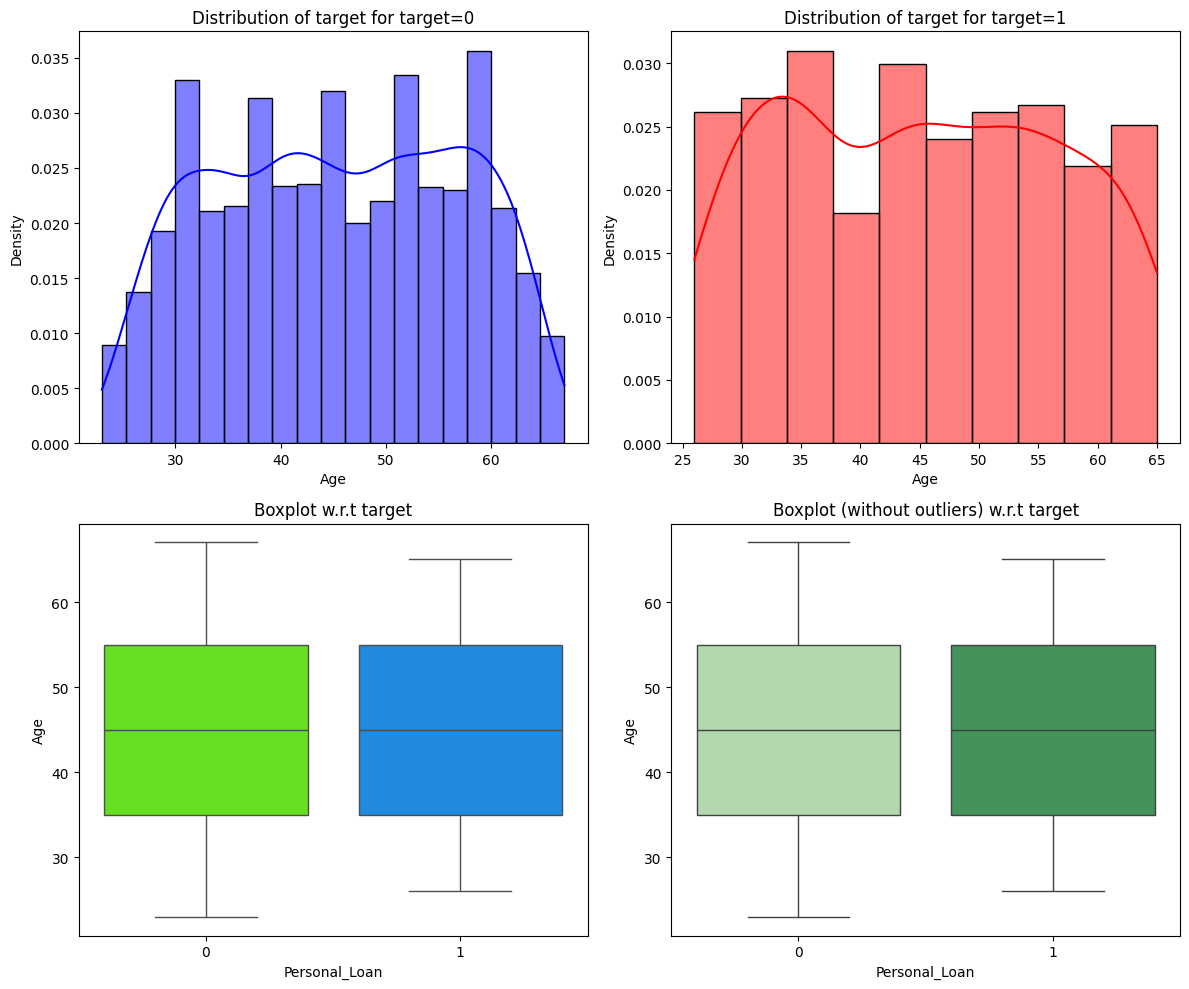

In [39]:
boxplotTargetPredictor(data, "Age", "Personal_Loan")

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Age                 5000 non-null   int64   
 1   Experience          5000 non-null   int64   
 2   Income              5000 non-null   int64   
 3   ZIPCode             5000 non-null   category
 4   Family              5000 non-null   int64   
 5   CCAvg               5000 non-null   float64 
 6   Education           5000 non-null   category
 7   Mortgage            5000 non-null   category
 8   Personal_Loan       5000 non-null   category
 9   Securities_Account  5000 non-null   category
 10  CD_Account          5000 non-null   category
 11  Online              5000 non-null   category
 12  CreditCard          5000 non-null   category
dtypes: category(8), float64(1), int64(4)
memory usage: 251.3 KB


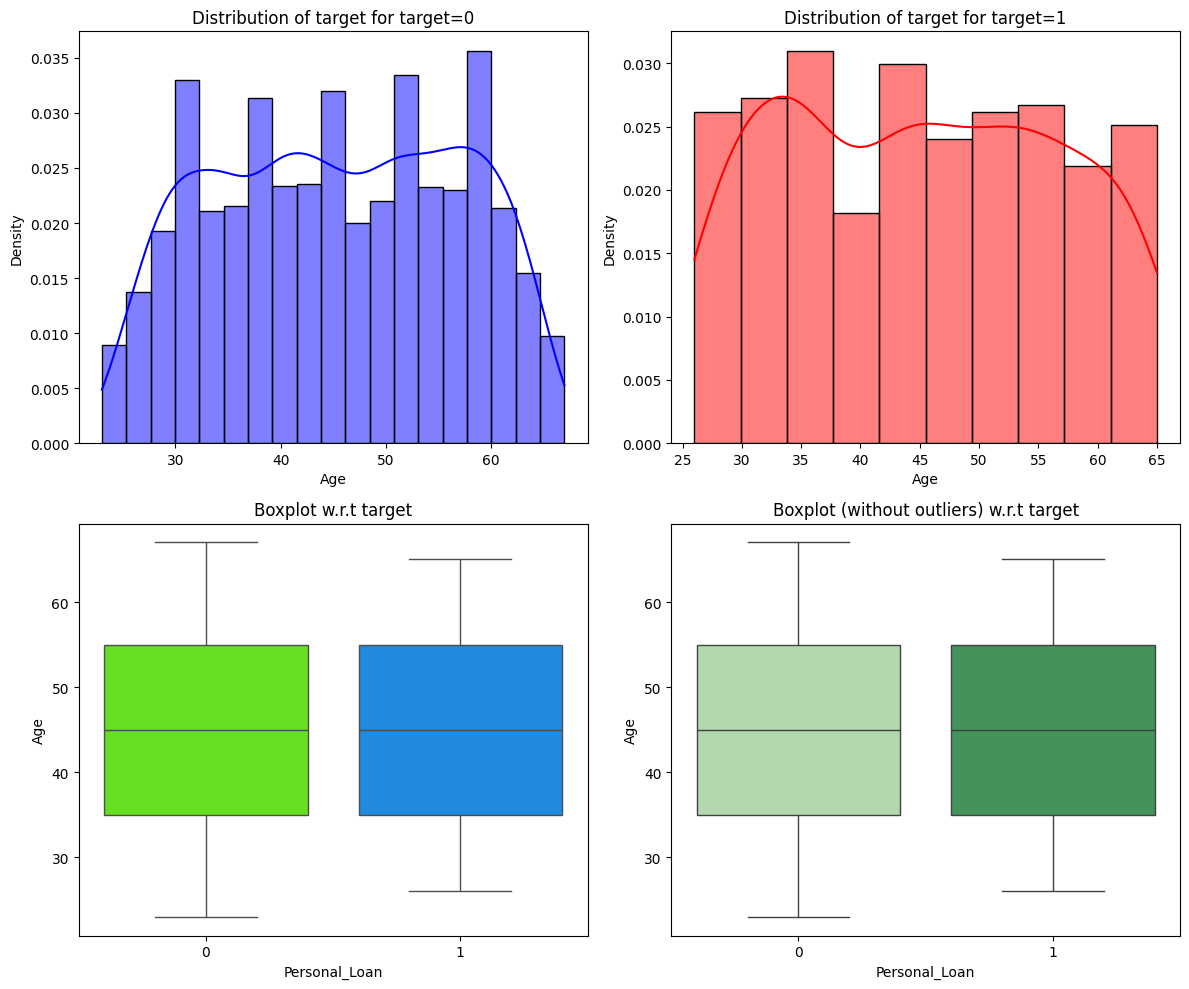

In [41]:
boxplotTargetPredictor(data, "Age", "Personal_Loan")

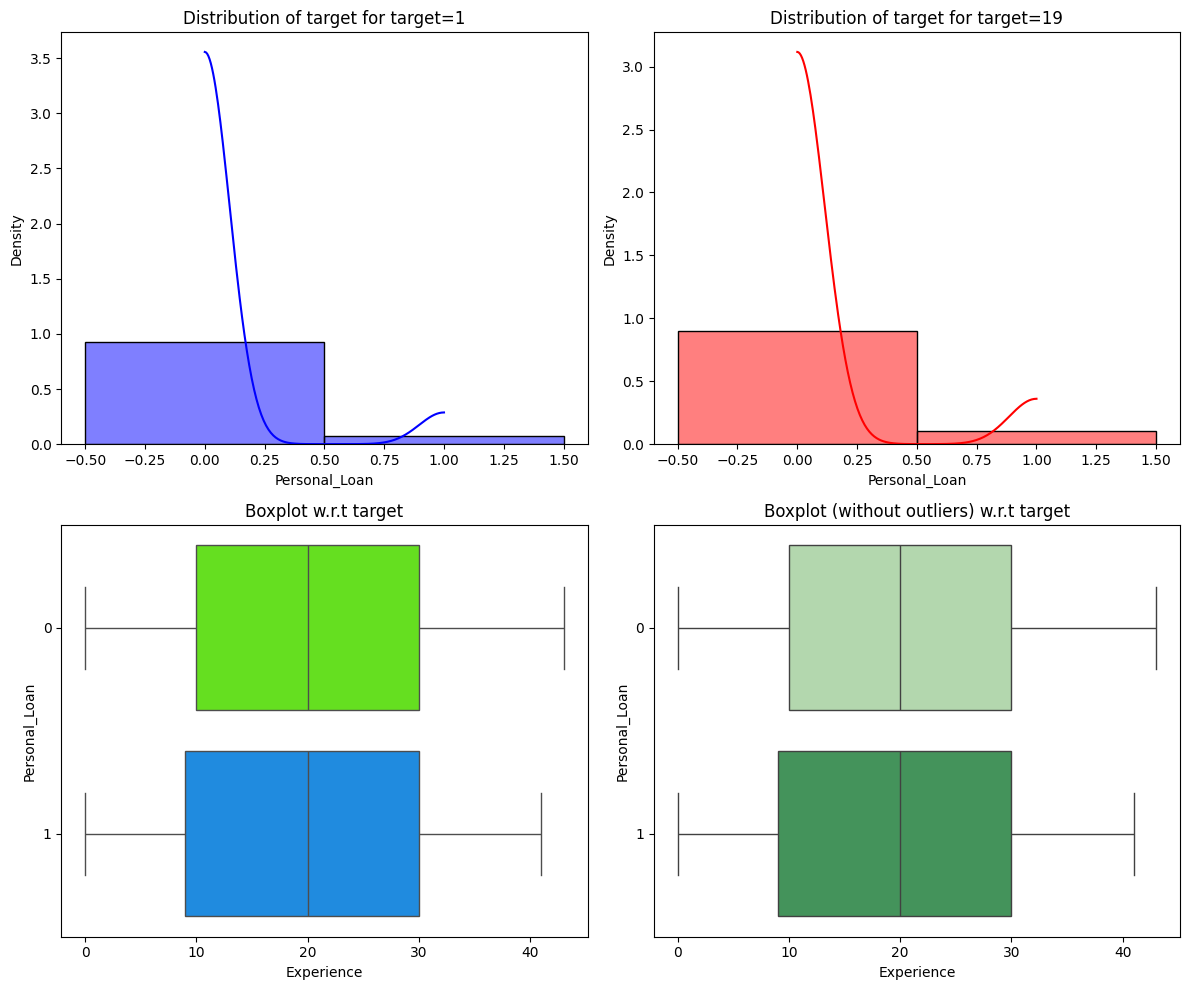

In [42]:
boxplotTargetPredictor(data, "Personal_Loan", "Experience")

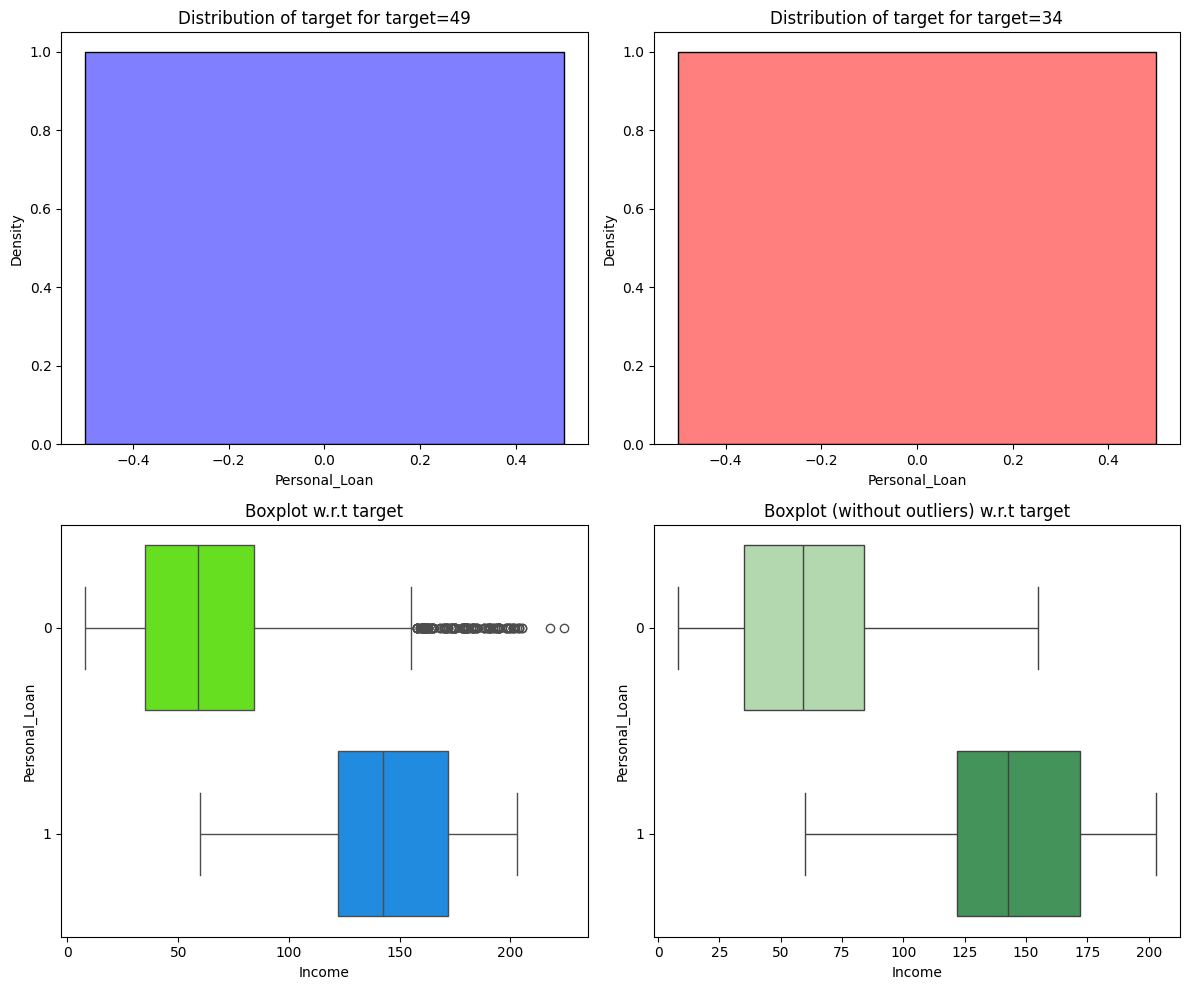

In [43]:
boxplotTargetPredictor(data, "Personal_Loan", "Income")

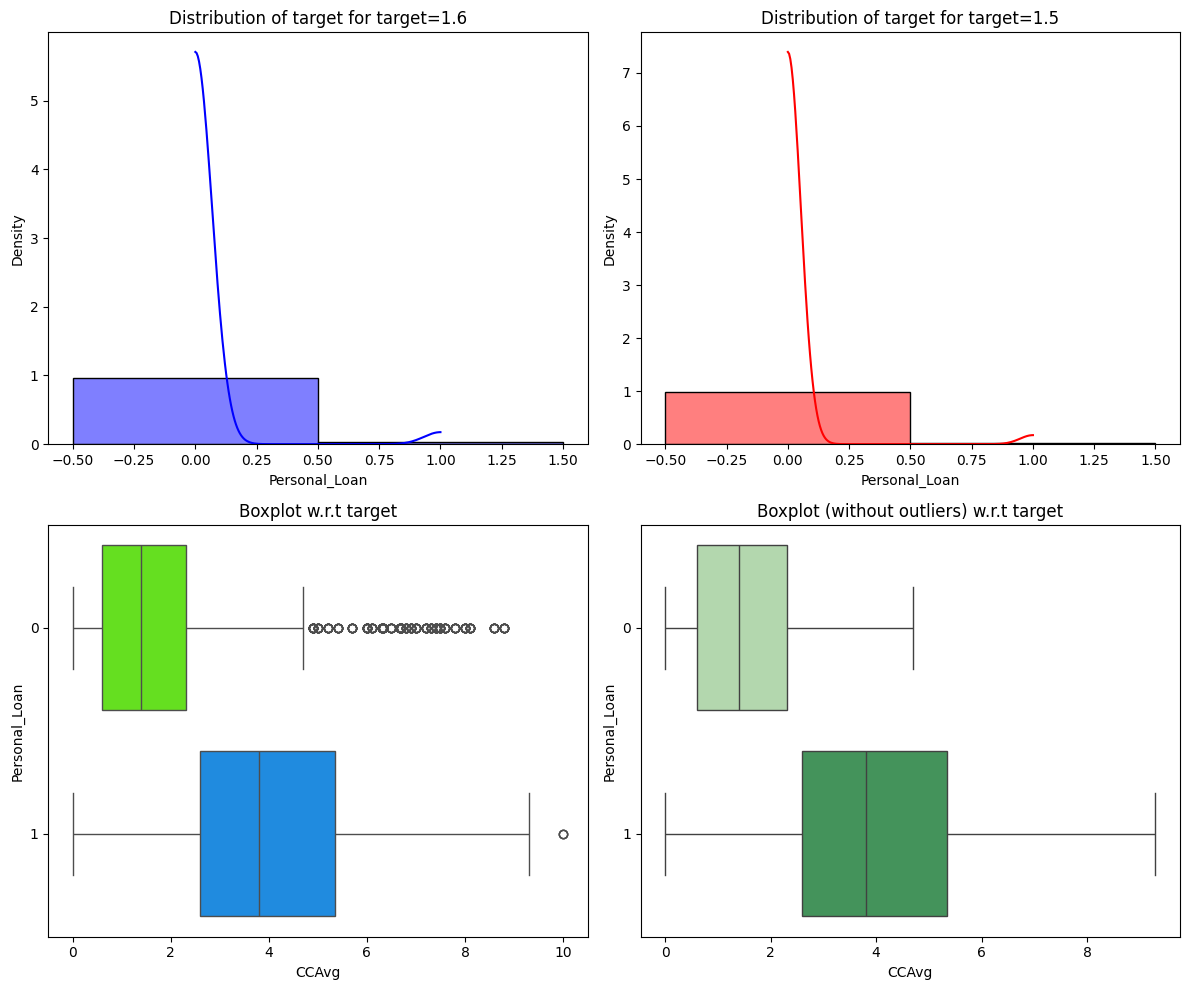

In [44]:
boxplotTargetPredictor(data, "Personal_Loan", "CCAvg")

## Data Preprocessing

* Missing value treatment
* Feature engineering (if needed)
* Outlier detection and treatment (if needed)
* Preparing data for modeling
* Any other preprocessing steps (if needed)

In [45]:
Q1 = data.select_dtypes(include=["float64", "int64"]).quantile(0.25)
Q3 = data.select_dtypes(include=["float64", "int64"]).quantile(0.75)
IQR = Q3 - Q1
lower = (Q1 - 1.5 * IQR)
upper = Q3 + 1.5 * IQR

print(IQR)
print("Lower")
print (lower)
print("Upper")
print(upper)

Age           20.0
Experience    20.0
Income        59.0
Family         2.0
CCAvg          1.8
dtype: float64
Lower
Age            5.0
Experience   -20.0
Income       -49.5
Family        -2.0
CCAvg         -2.0
dtype: float64
Upper
Age            85.0
Experience     60.0
Income        186.5
Family          6.0
CCAvg           5.2
dtype: float64


In [46]:
data.head()

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,25,1,49,91,4,1.6,1,0,0,1,0,0,0
1,45,19,34,90,3,1.5,1,0,0,1,0,0,0
2,39,15,11,94,1,1.0,1,0,0,0,0,0,0
3,35,9,100,94,1,2.7,2,0,0,0,0,0,0
4,35,8,45,91,4,1.0,2,0,0,0,0,0,1


In [47]:
X=data.drop(['Personal_Loan','Experience'],axis=1)
Y=data['Personal_Loan']
X= pd.get_dummies(X, columns=['ZIPCode','Education'],drop_first=True)
X= X.astype(float)
X_train,X_test,y_train,y_test = train_test_split(X,Y,random_state=1,test_size=0.30)

In [48]:
X_train.head()

,Age,Income,Family,CCAvg,Mortgage,Securities_Account,CD_Account,Online,CreditCard,ZIPCode_91,ZIPCode_92,ZIPCode_93,ZIPCode_94,ZIPCode_95,ZIPCode_96,Education_2,Education_3
1334,47.0,35.0,2.0,1.3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4768,38.0,39.0,1.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
65,59.0,131.0,1.0,3.8,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
177,29.0,65.0,4.0,1.8,244.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4489,39.0,21.0,3.0,0.2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


## Model Building

### Model Evaluation Criterion

In [49]:

def modelPerformance(model, predictors, target):
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)
    recall = recall_score(target, pred)
    precision = precision_score(target, pred)
    f1 = f1_score(target, pred)

    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )
    return df_perf

In [50]:
def confustionMatrix(model, predictors, target):
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

*


### Model Building

In [97]:
D_tree1 = DecisionTreeClassifier(random_state=1,criterion="gini",)
D_tree1.fit(X_train,y_train)

DecisionTreeClassifier(random_state=1)

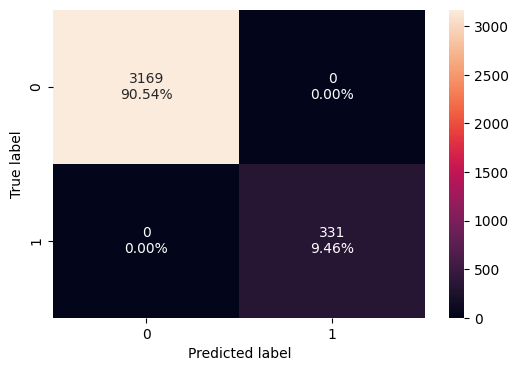

In [52]:
confustionMatrix(D_tree1,X_train,y_train)

In [99]:
decisionTreePerfomanceTrain = modelPerformance(D_tree1,X_train,y_train)
decisionTreePerfomanceTrain

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


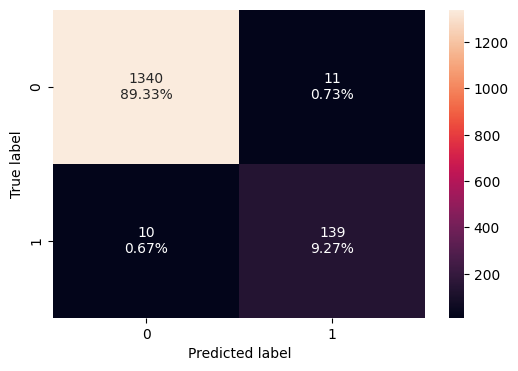

In [54]:
confustionMatrix(D_tree1,X_test,y_test)

In [55]:
decisionTreePerfomanceTest = modelPerformance(D_tree1,X_test,y_test)
decisionTreePerfomanceTest

,Accuracy,Recall,Precision,F1
0,0.986,0.932886,0.926667,0.929766


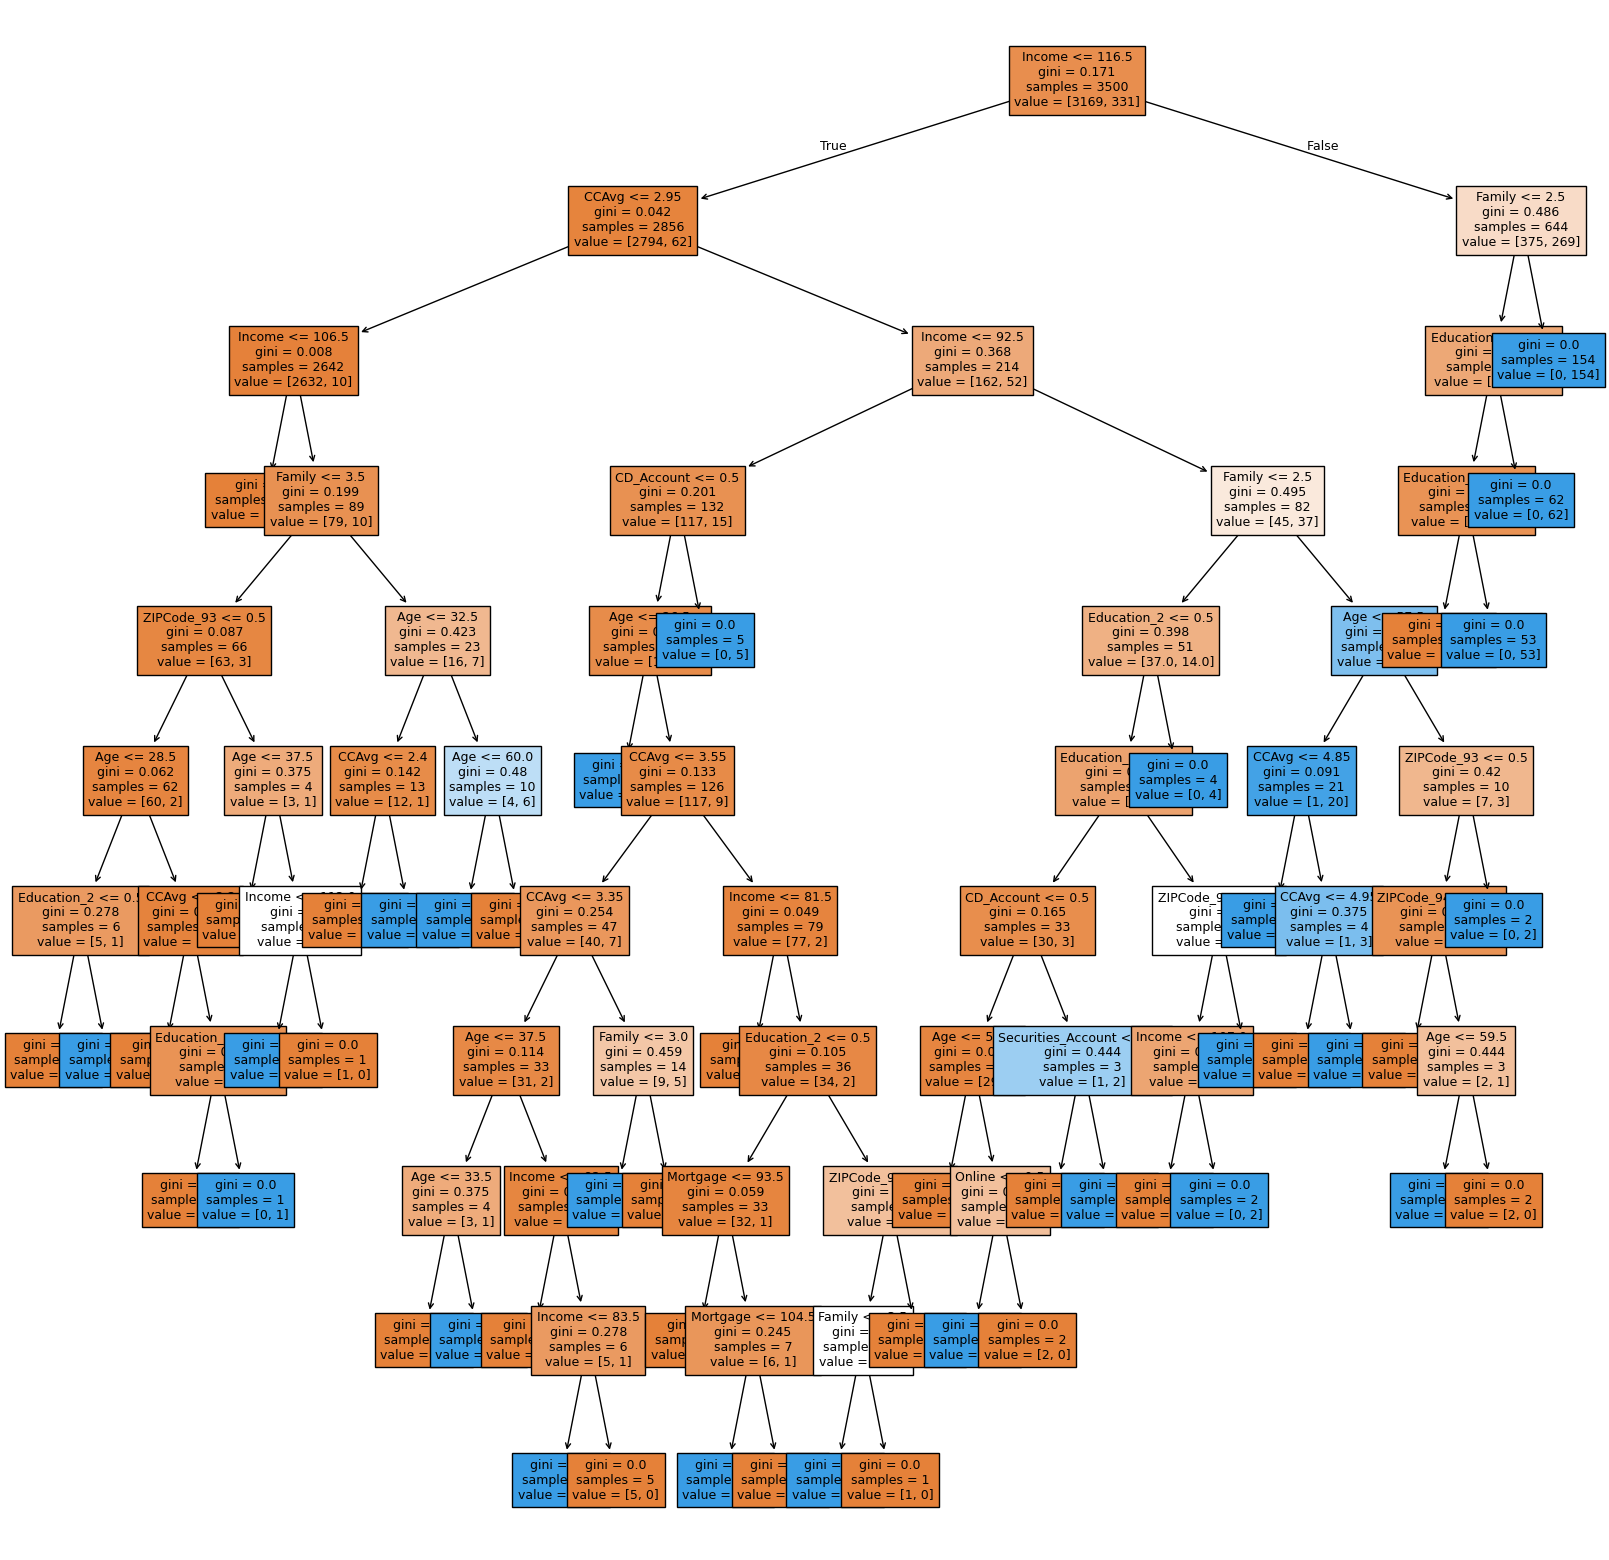

In [56]:
featureName = list(X_train.columns)
plt.figure(figsize=(20,20))
out = tree.plot_tree(
    D_tree1,
    feature_names= featureName,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names = None
)
for o in out:
  arrow = o.arrow_patch
  if arrow is not None:
    arrow.set_edgecolor('black')
    arrow.set_linewidth(1)
plt.show()

In [57]:
print(tree.export_text(D_tree1,feature_names=featureName,show_weights=True))

|--- Income <= 116.50
|   |--- CCAvg <= 2.95
|   |   |--- Income <= 106.50
|   |   |   |--- weights: [2553.00, 0.00] class: 0
|   |   |--- Income >  106.50
|   |   |   |--- Family <= 3.50
|   |   |   |   |--- ZIPCode_93 <= 0.50
|   |   |   |   |   |--- Age <= 28.50
|   |   |   |   |   |   |--- Education_2 <= 0.50
|   |   |   |   |   |   |   |--- weights: [5.00, 0.00] class: 0
|   |   |   |   |   |   |--- Education_2 >  0.50
|   |   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |   |--- Age >  28.50
|   |   |   |   |   |   |--- CCAvg <= 2.20
|   |   |   |   |   |   |   |--- weights: [48.00, 0.00] class: 0
|   |   |   |   |   |   |--- CCAvg >  2.20
|   |   |   |   |   |   |   |--- Education_3 <= 0.50
|   |   |   |   |   |   |   |   |--- weights: [7.00, 0.00] class: 0
|   |   |   |   |   |   |   |--- Education_3 >  0.50
|   |   |   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |--- ZIPCode_93 >  0.50
|   |   |   |   |   |--- Age <= 37.50

In [58]:
decisionTreePerfomanceTest = modelPerformance(D_tree1,X_test,y_test)
decisionTreePerfomanceTest

,Accuracy,Recall,Precision,F1
0,0.986,0.932886,0.926667,0.929766


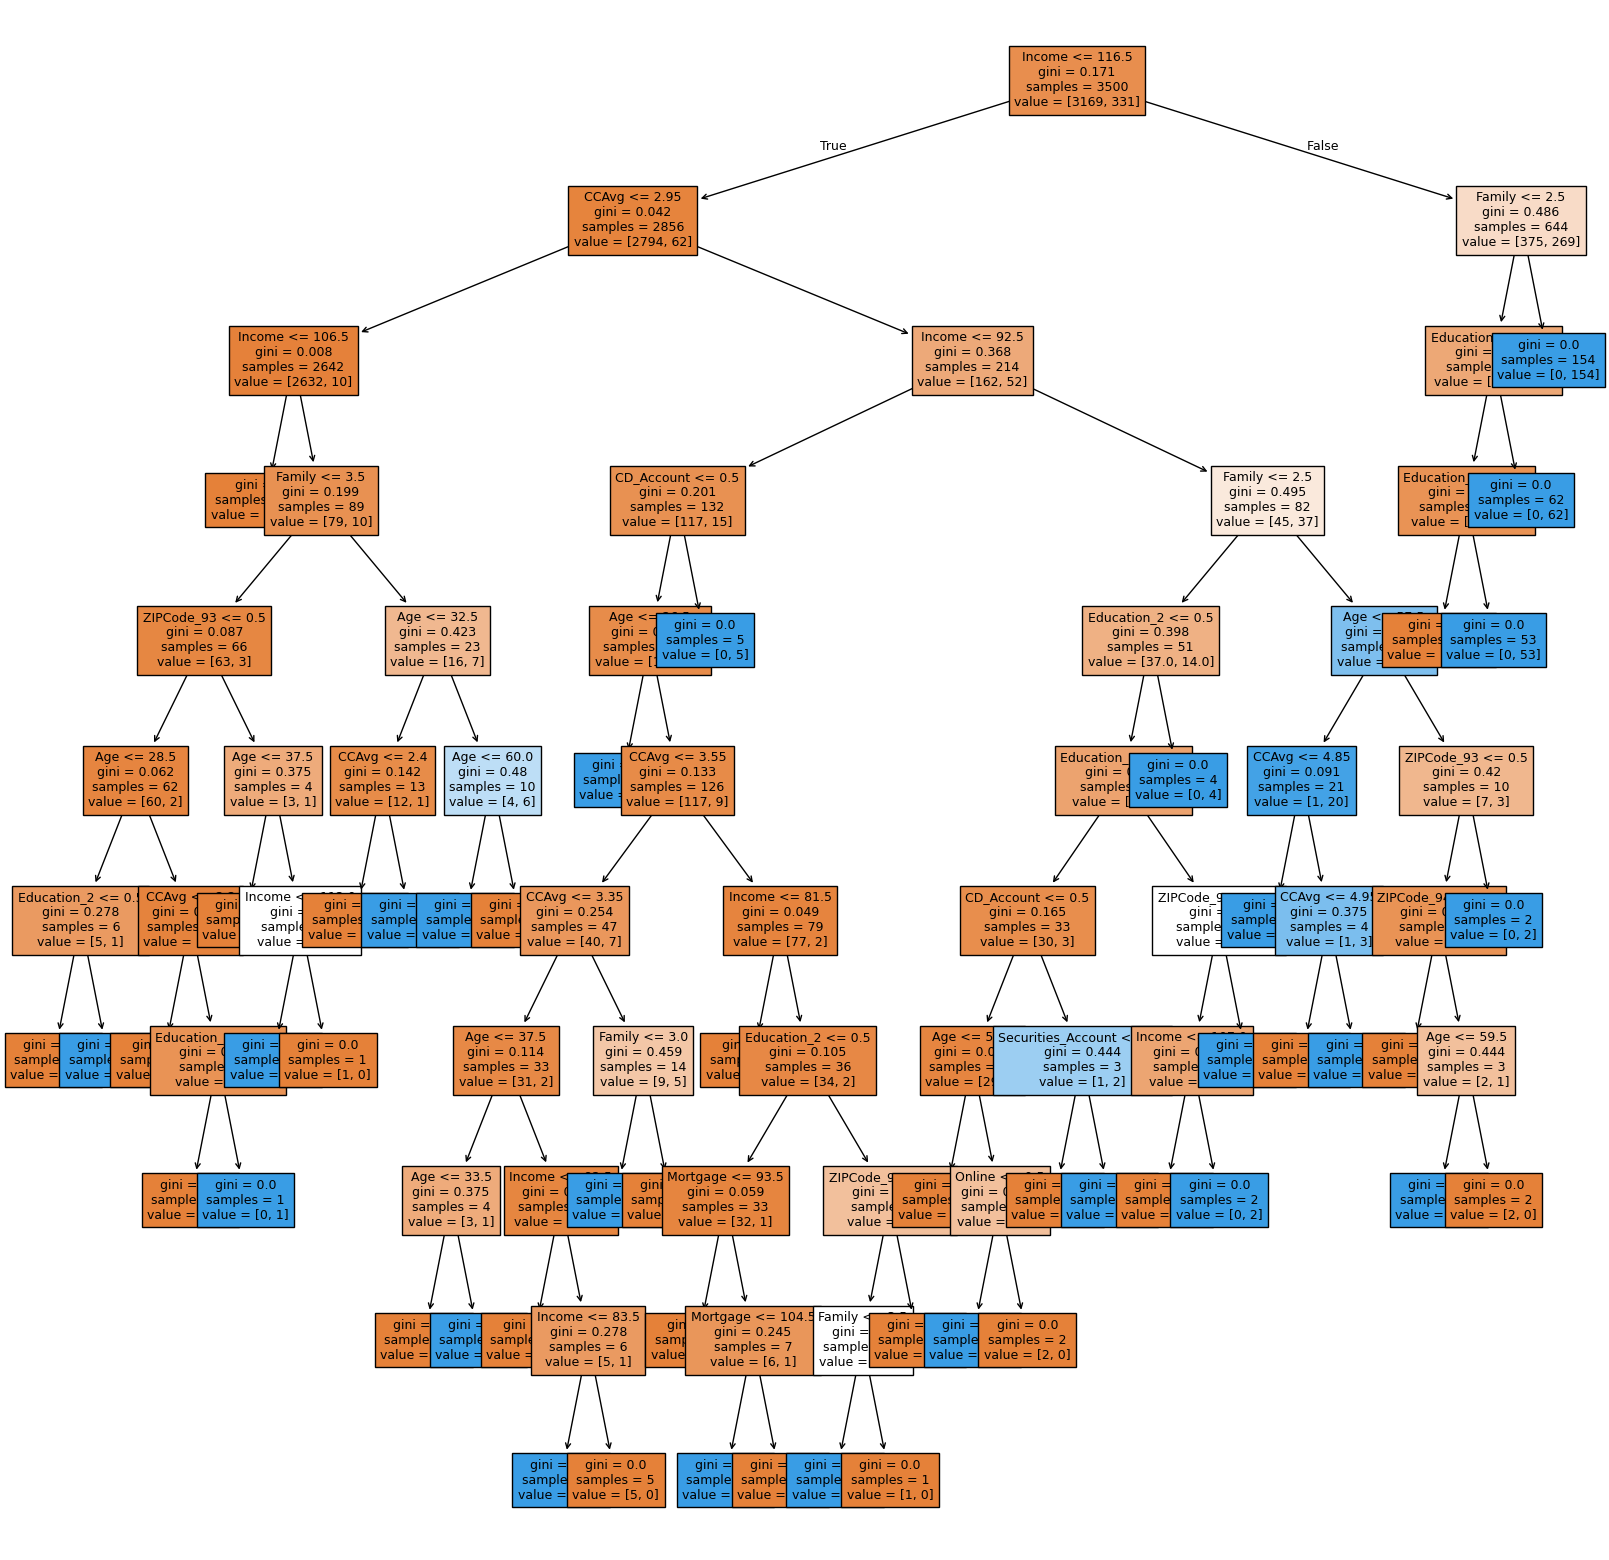

In [59]:
featureNameTest = list(X_test.columns)
plt.figure(figsize=(20,20))
out = tree.plot_tree(
    D_tree1,
    feature_names= featureNameTest,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names = None
)
for o in out:
  arrow = o.arrow_patch
  if arrow is not None:
    arrow.set_edgecolor('black')
    arrow.set_linewidth(1)
plt.show()

In [60]:
print(tree.export_text(D_tree1,feature_names=featureNameTest,show_weights=True))

|--- Income <= 116.50
|   |--- CCAvg <= 2.95
|   |   |--- Income <= 106.50
|   |   |   |--- weights: [2553.00, 0.00] class: 0
|   |   |--- Income >  106.50
|   |   |   |--- Family <= 3.50
|   |   |   |   |--- ZIPCode_93 <= 0.50
|   |   |   |   |   |--- Age <= 28.50
|   |   |   |   |   |   |--- Education_2 <= 0.50
|   |   |   |   |   |   |   |--- weights: [5.00, 0.00] class: 0
|   |   |   |   |   |   |--- Education_2 >  0.50
|   |   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |   |--- Age >  28.50
|   |   |   |   |   |   |--- CCAvg <= 2.20
|   |   |   |   |   |   |   |--- weights: [48.00, 0.00] class: 0
|   |   |   |   |   |   |--- CCAvg >  2.20
|   |   |   |   |   |   |   |--- Education_3 <= 0.50
|   |   |   |   |   |   |   |   |--- weights: [7.00, 0.00] class: 0
|   |   |   |   |   |   |   |--- Education_3 >  0.50
|   |   |   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |--- ZIPCode_93 >  0.50
|   |   |   |   |   |--- Age <= 37.50

## Model Performance Improvement

**PrePruning**

In [61]:
max_depth_values = np.arange(2, 7, 3)
max_leaf_nodes_values = [50, 75, 150, 250]
min_samples_split_values = [10, 30, 50, 70]
best_estimator = None
best_score_diff = float('inf')
best_test_score = 0.0

for max_depth in max_depth_values:
    for max_leaf_nodes in max_leaf_nodes_values:
        for min_samples_split in min_samples_split_values:

            # Initialize the tree with the current set of parameters
            estimator = DecisionTreeClassifier(
                max_depth=max_depth,
                max_leaf_nodes=max_leaf_nodes,
                min_samples_split=min_samples_split,
                random_state=42
            )

            # Fit the model to the training data
            estimator.fit(X_train, y_train)

            # Make predictions on the training and test sets
            y_train_pred = estimator.predict(X_train)
            y_test_pred = estimator.predict(X_test)

            # Calculate recall scores for training and test sets
            train_recall_score = recall_score(y_train, y_train_pred)
            test_recall_score = recall_score(y_test, y_test_pred)

            # Calculate the absolute difference between training and test recall scores
            score_diff = abs(train_recall_score - test_recall_score)

            # Update the best estimator and best score if the current one has a smaller score difference
            if (score_diff < best_score_diff) & (test_recall_score > best_test_score):
                best_score_diff = score_diff
                best_test_score = test_recall_score
                best_estimator = estimator

# Print the best parameters
print("Best parameters found:")
print(f"Max depth: {best_estimator.max_depth}")
print(f"Max leaf nodes: {best_estimator.max_leaf_nodes}")
print(f"Min samples split: {best_estimator.min_samples_split}")
print(f"Best test recall score: {best_test_score}")

Best parameters found:
Max depth: 5
Max leaf nodes: 50
Min samples split: 50
Best test recall score: 0.8657718120805369


In [62]:
Dtree2 = best_estimator


In [63]:
Dtree2.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=np.int64(5), max_leaf_nodes=50,
                       min_samples_split=50, random_state=42)

In [95]:
decisionTreePerfomancePreTrain = modelPerformance(Dtree2,X_train,y_train)
decisionTreePerfomancePreTrain

,Accuracy,Recall,Precision,F1
0,0.989429,0.912387,0.974194,0.942278


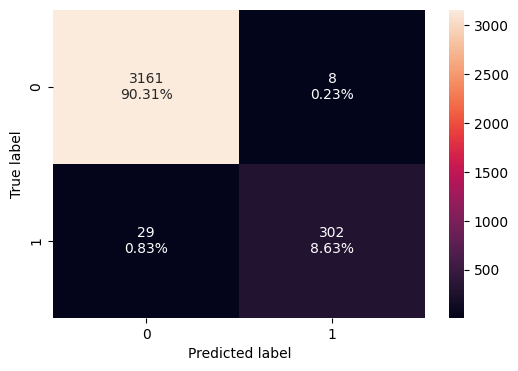

In [65]:
confustionMatrix(Dtree2,X_train,y_train)

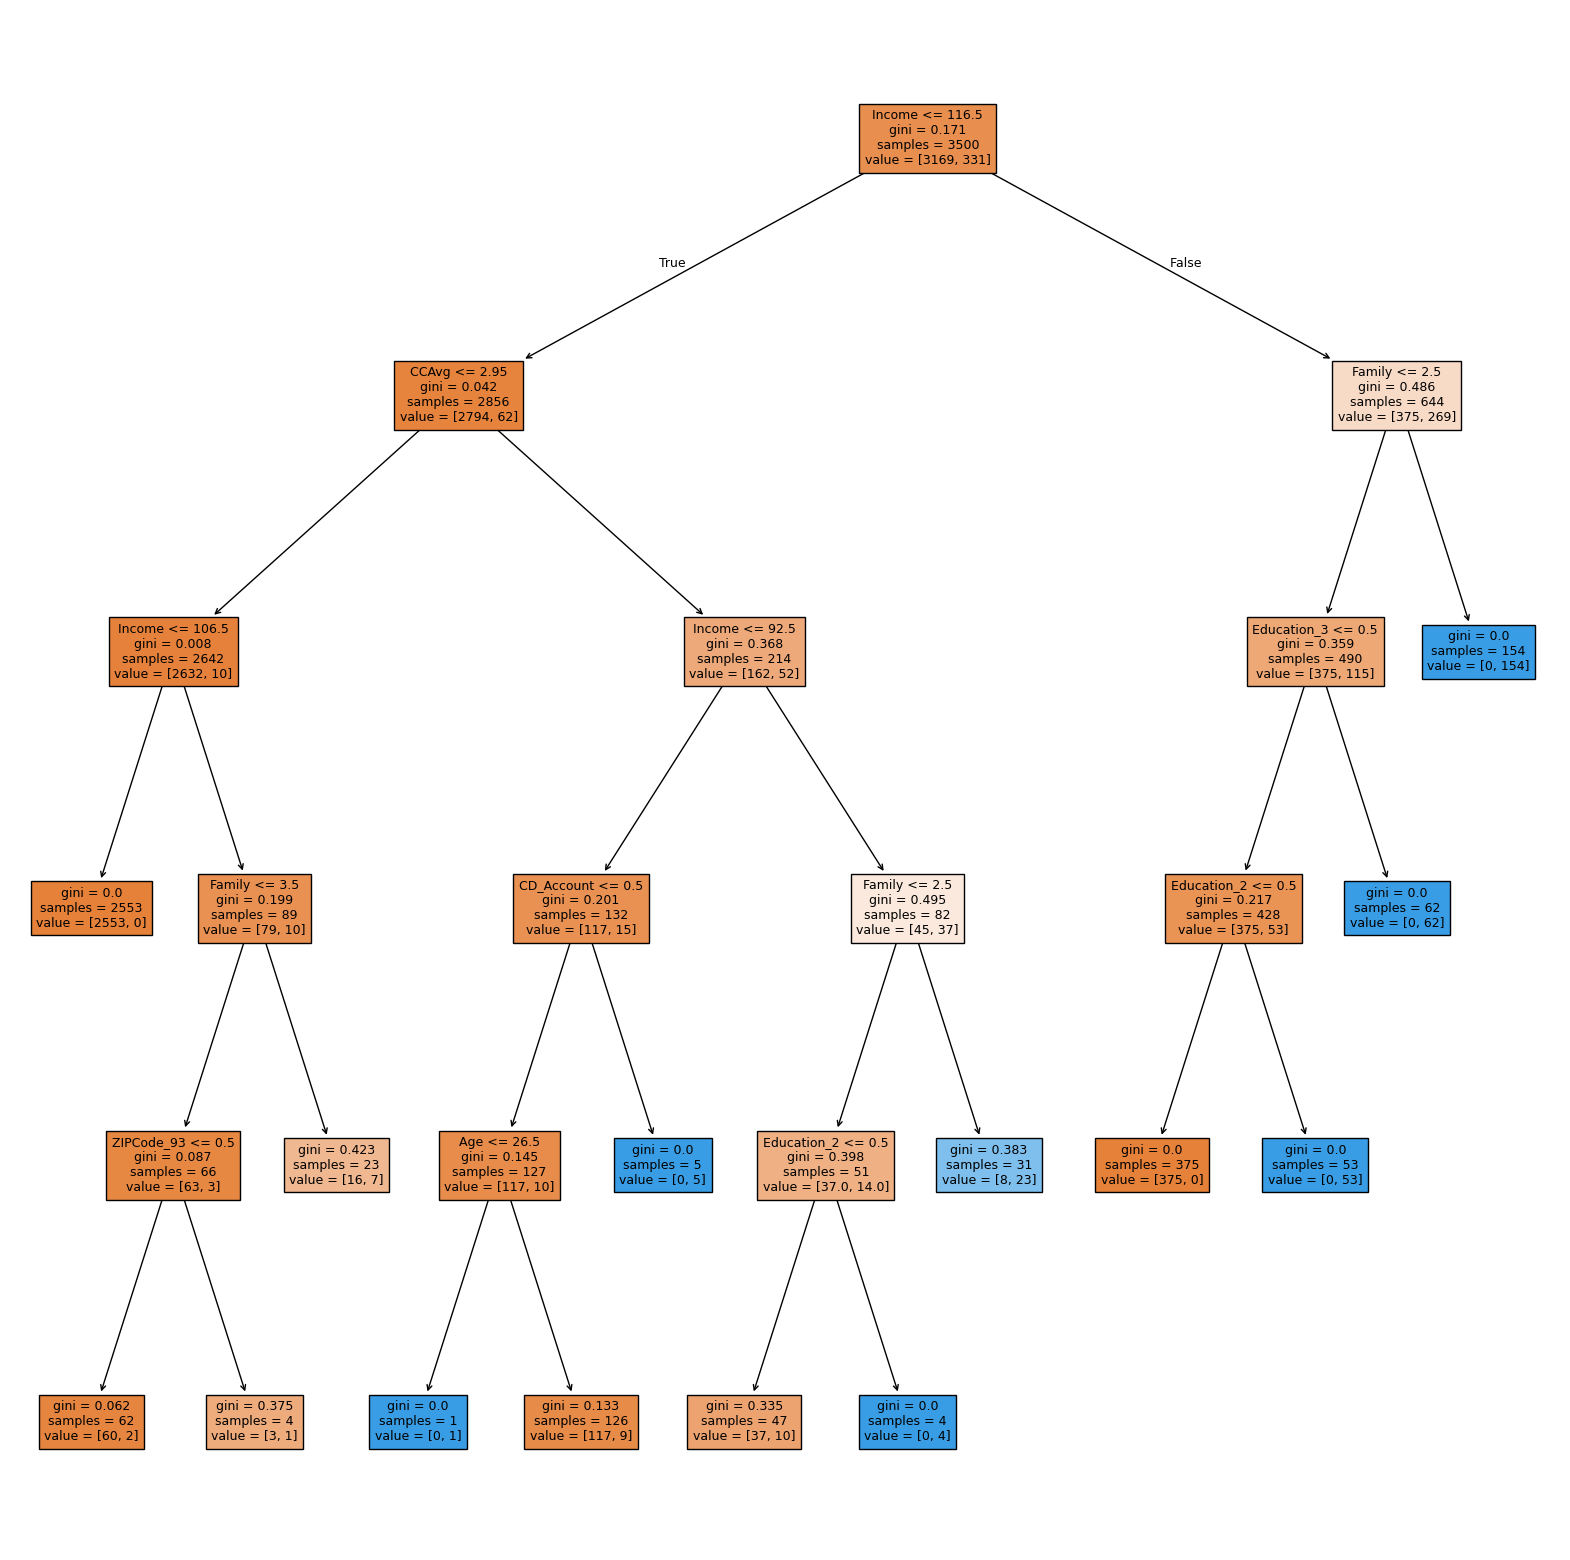

In [66]:
featureName = list(X_train.columns)
plt.figure(figsize=(20,20))
out = tree.plot_tree(
    Dtree2,
    feature_names= featureName,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names = None
)
for o in out:
  arrow = o.arrow_patch
  if arrow is not None:
    arrow.set_edgecolor('black')
    arrow.set_linewidth(1)
plt.show()

In [67]:
print(tree.export_text(Dtree2,feature_names=featureName,show_weights=True))

|--- Income <= 116.50
|   |--- CCAvg <= 2.95
|   |   |--- Income <= 106.50
|   |   |   |--- weights: [2553.00, 0.00] class: 0
|   |   |--- Income >  106.50
|   |   |   |--- Family <= 3.50
|   |   |   |   |--- ZIPCode_93 <= 0.50
|   |   |   |   |   |--- weights: [60.00, 2.00] class: 0
|   |   |   |   |--- ZIPCode_93 >  0.50
|   |   |   |   |   |--- weights: [3.00, 1.00] class: 0
|   |   |   |--- Family >  3.50
|   |   |   |   |--- weights: [16.00, 7.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- Income <= 92.50
|   |   |   |--- CD_Account <= 0.50
|   |   |   |   |--- Age <= 26.50
|   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |--- Age >  26.50
|   |   |   |   |   |--- weights: [117.00, 9.00] class: 0
|   |   |   |--- CD_Account >  0.50
|   |   |   |   |--- weights: [0.00, 5.00] class: 1
|   |   |--- Income >  92.50
|   |   |   |--- Family <= 2.50
|   |   |   |   |--- Education_2 <= 0.50
|   |   |   |   |   |--- weights: [37.00, 10.00] class: 0
|   |   |   |   

In [68]:
decisionTreePerfomanceT2 = modelPerformance(Dtree2,X_test,y_test)
decisionTreePerfomanceT2

,Accuracy,Recall,Precision,F1
0,0.984,0.865772,0.969925,0.914894


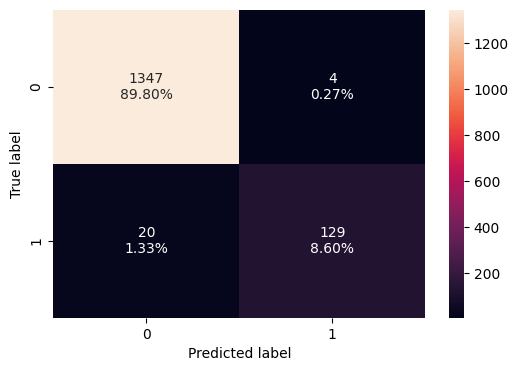

In [69]:
confustionMatrix(Dtree2,X_test,y_test)

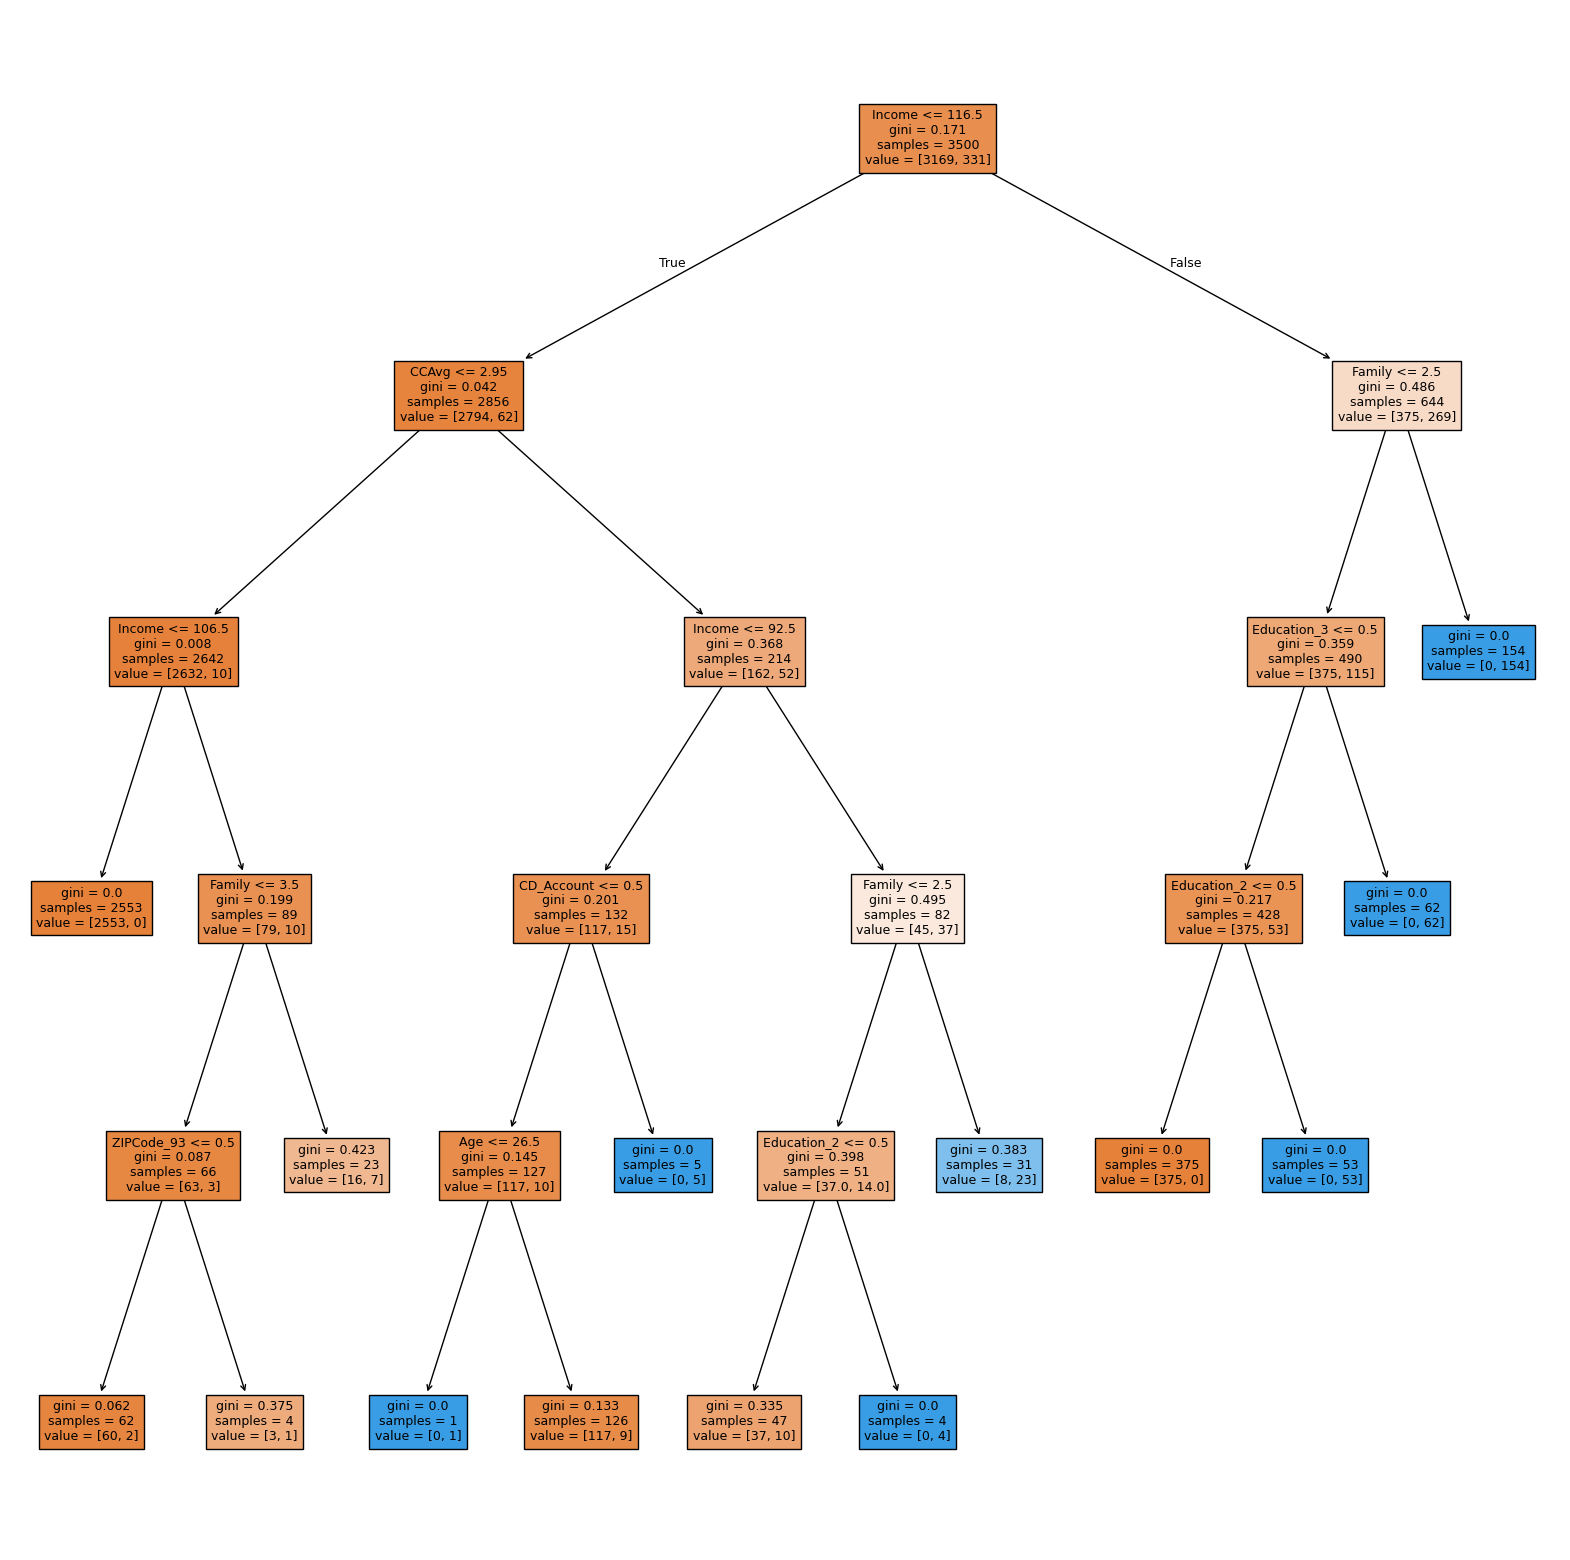

In [70]:
featureNameTest = list(X_test.columns)
plt.figure(figsize=(20,20))
out = tree.plot_tree(
    Dtree2,
    feature_names= featureNameTest,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names = None
)
for o in out:
  arrow = o.arrow_patch
  if arrow is not None:
    arrow.set_edgecolor('black')
    arrow.set_linewidth(1)
plt.show()

In [71]:
print(tree.export_text(Dtree2,feature_names=featureNameTest,show_weights=True))

|--- Income <= 116.50
|   |--- CCAvg <= 2.95
|   |   |--- Income <= 106.50
|   |   |   |--- weights: [2553.00, 0.00] class: 0
|   |   |--- Income >  106.50
|   |   |   |--- Family <= 3.50
|   |   |   |   |--- ZIPCode_93 <= 0.50
|   |   |   |   |   |--- weights: [60.00, 2.00] class: 0
|   |   |   |   |--- ZIPCode_93 >  0.50
|   |   |   |   |   |--- weights: [3.00, 1.00] class: 0
|   |   |   |--- Family >  3.50
|   |   |   |   |--- weights: [16.00, 7.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- Income <= 92.50
|   |   |   |--- CD_Account <= 0.50
|   |   |   |   |--- Age <= 26.50
|   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |--- Age >  26.50
|   |   |   |   |   |--- weights: [117.00, 9.00] class: 0
|   |   |   |--- CD_Account >  0.50
|   |   |   |   |--- weights: [0.00, 5.00] class: 1
|   |   |--- Income >  92.50
|   |   |   |--- Family <= 2.50
|   |   |   |   |--- Education_2 <= 0.50
|   |   |   |   |   |--- weights: [37.00, 10.00] class: 0
|   |   |   |   

**Post Puring**

In [72]:
clf = DecisionTreeClassifier(random_state=1)

path = clf.cost_complexity_pruning_path(X_train, y_train)

ccp_alphas = abs(path.ccp_alphas)

impurities = path.impurities

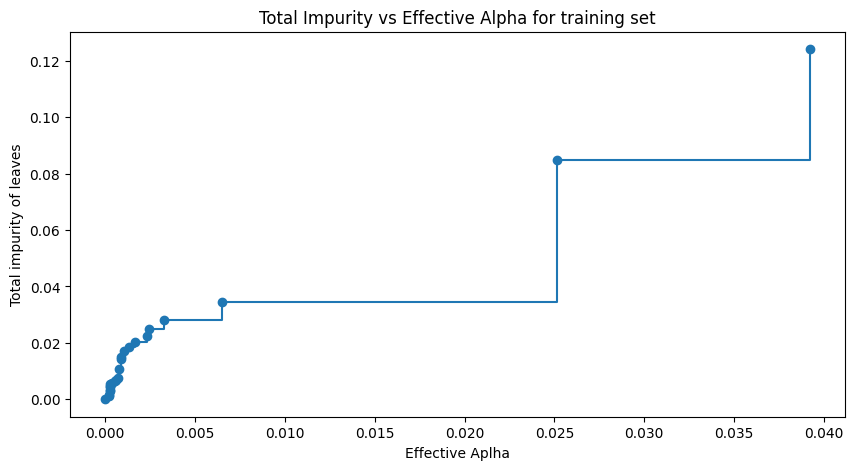

In [73]:
fig,ax = plt.subplots(figsize=(10,5))
ax.plot(ccp_alphas[:-1],impurities[:-1],marker='o',drawstyle="steps-post")
ax.set_xlabel('Effective Aplha')
ax.set_ylabel("Total impurity of leaves")
ax.set_title("Total Impurity vs Effective Alpha for training set");

In [74]:
clfs=[]
for ccp_alpha in ccp_alphas:
  clf = DecisionTreeClassifier(ccp_alpha=ccp_alpha,random_state=1)
  clf.fit(X_train,y_train)
  clfs.append(clf)

print("Number of nodes in the last tree is  {} with ccp_alpha{}".format(clfs[-1].tree_.node_count,ccp_alphas[-1]))

Number of nodes in the last tree is  1 with ccp_alpha0.04708834100596766


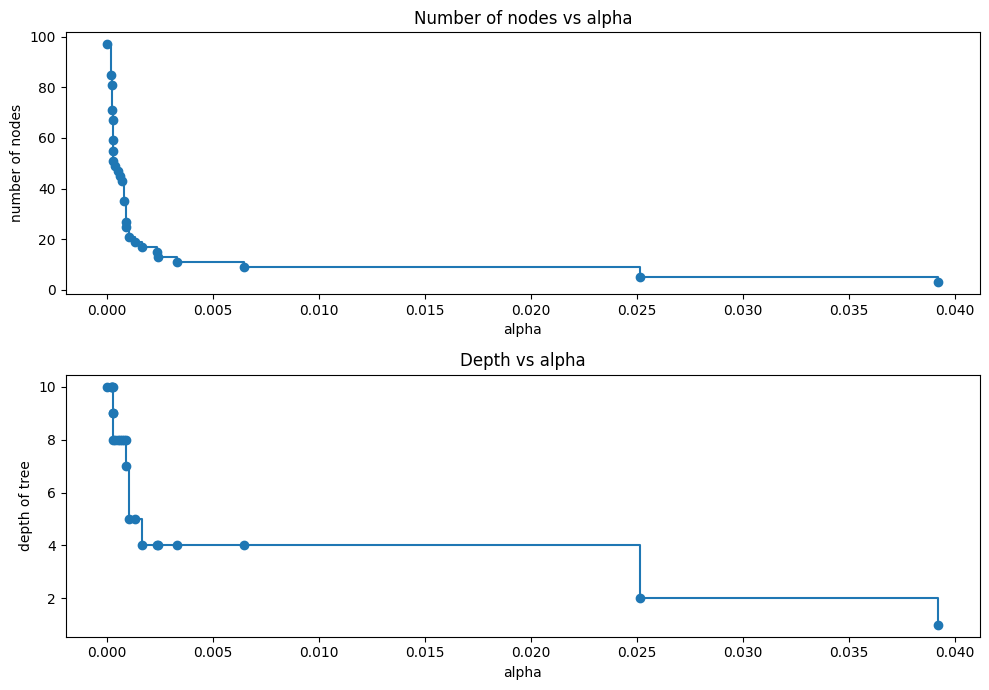

In [75]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

In [76]:
recall_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = recall_score(y_train, pred_train)
    recall_train.append(values_train)

recall_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = recall_score(y_test, pred_test)
    recall_test.append(values_test)

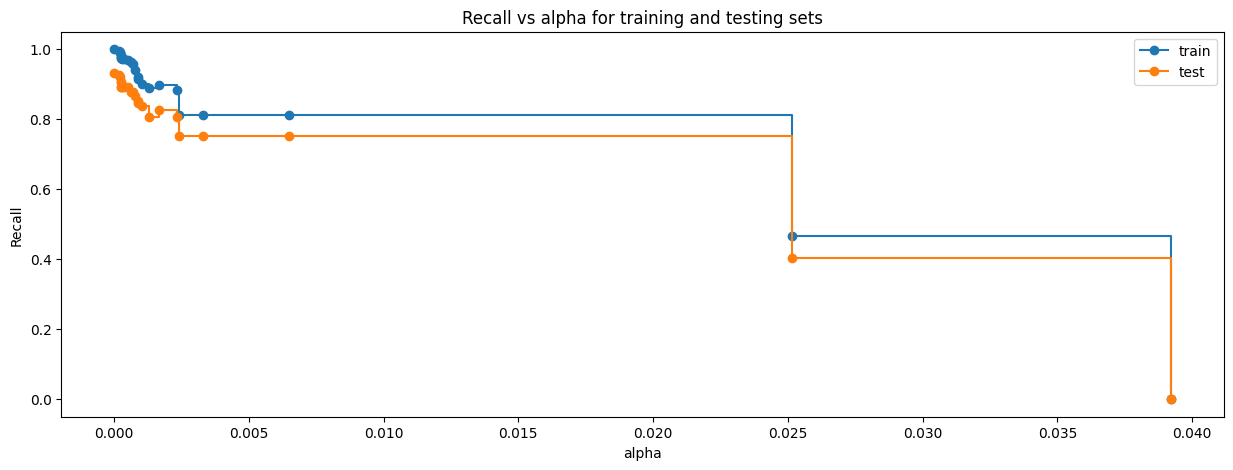

In [77]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(ccp_alphas, recall_train, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, recall_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [78]:
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=np.float64(0.0), random_state=1)


In [80]:
estimator2 = DecisionTreeClassifier(ccp_alpha=0.04708834100596766, class_weight={0: 0.15, 1: 0.85}, random_state=1)
estimator2.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.04708834100596766,
                       class_weight={0: 0.15, 1: 0.85}, random_state=1)

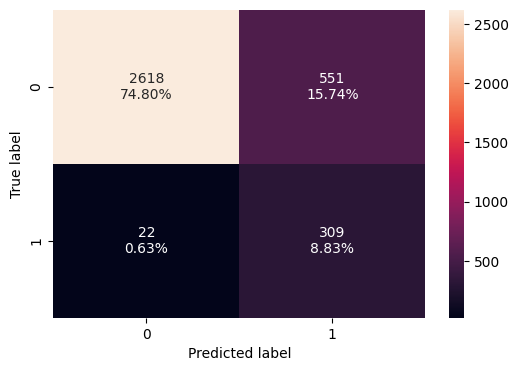

In [81]:
confustionMatrix(estimator2,X_train,y_train)

In [89]:
decisionTreePerfomancePostTrain = modelPerformance(estimator2,X_train,y_train)
decisionTreePerfomancePostTrain

,Accuracy,Recall,Precision,F1
0,0.836286,0.933535,0.359302,0.518892


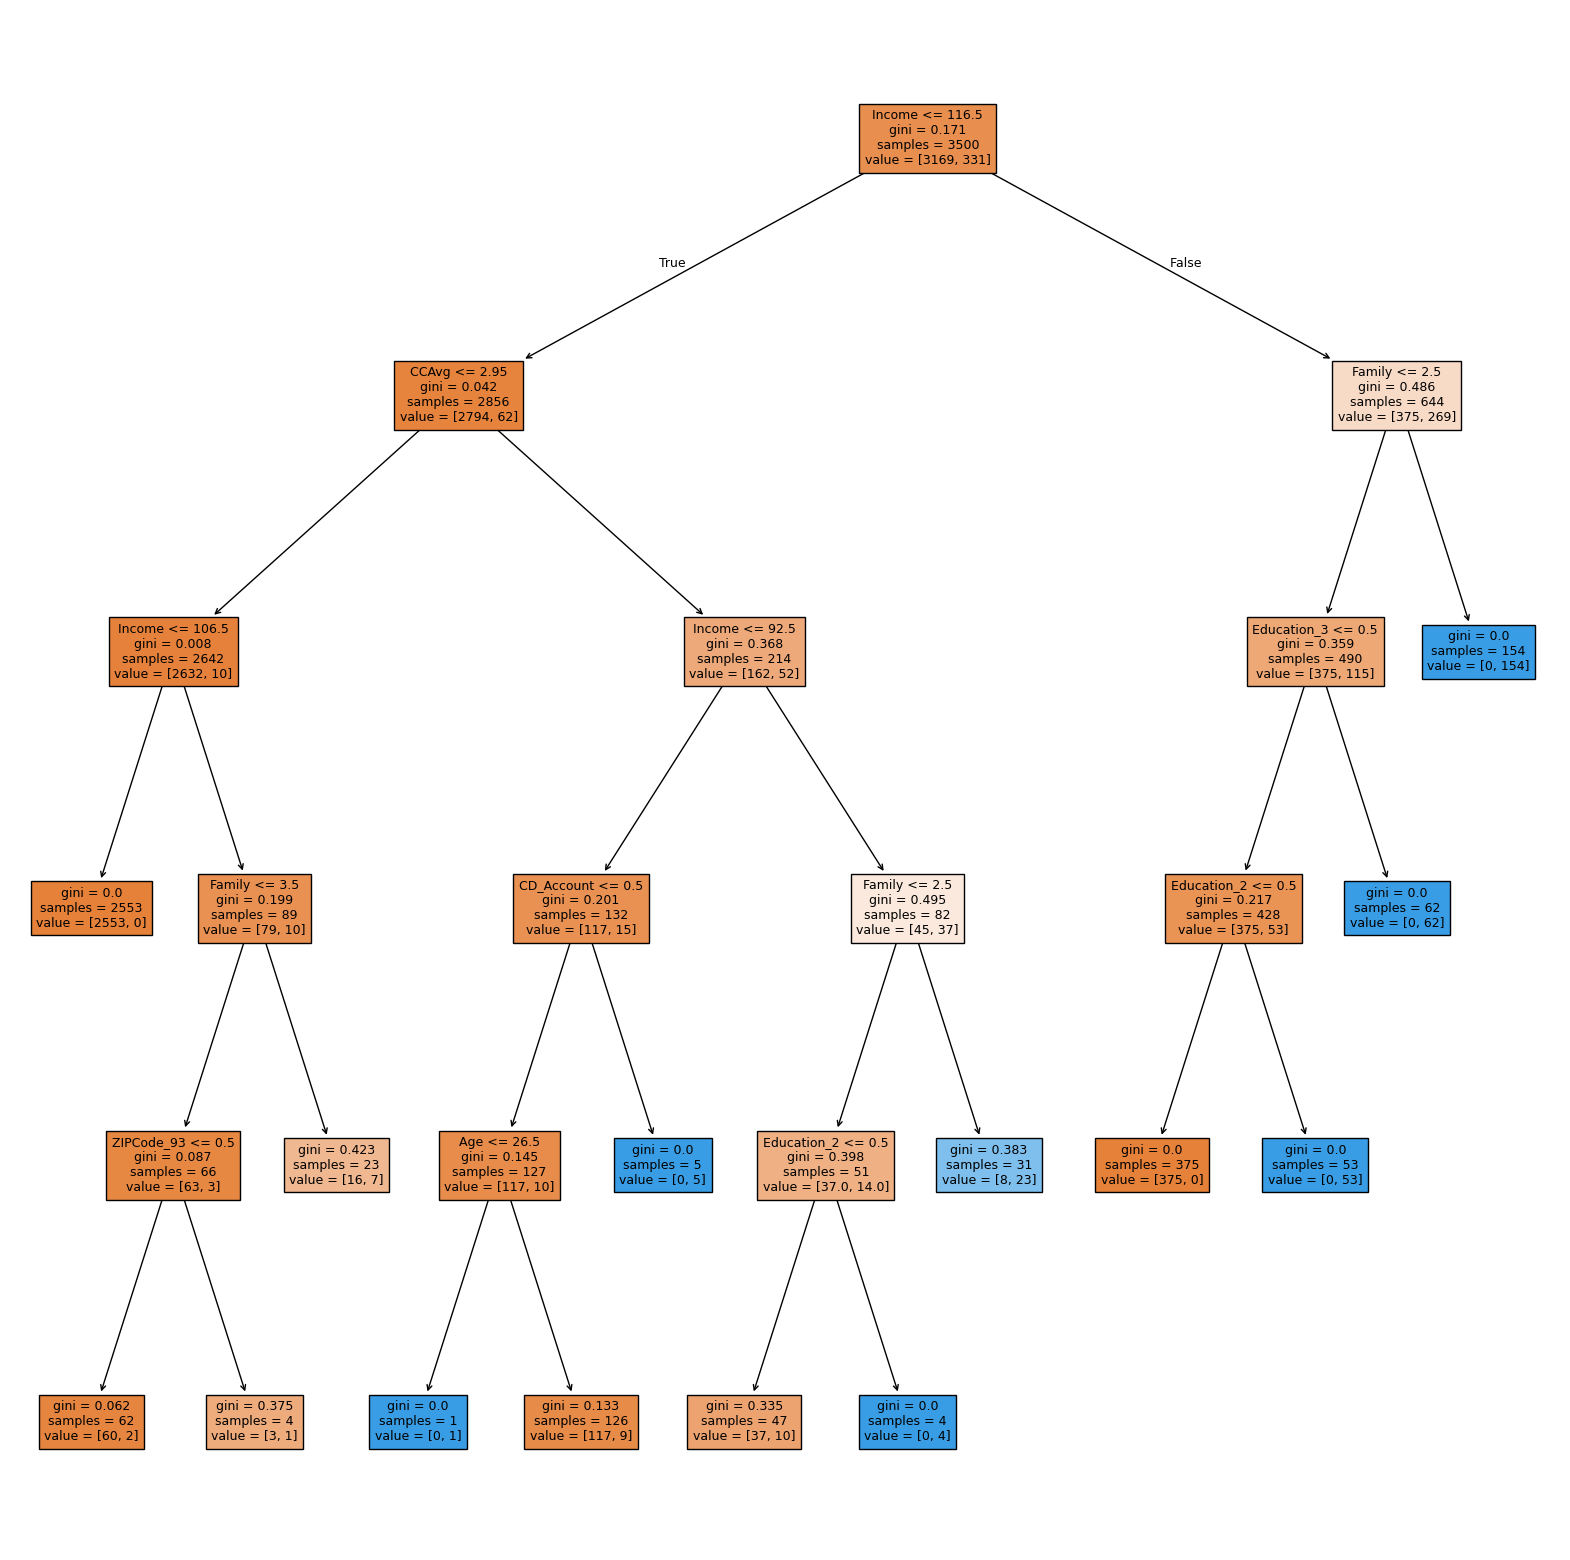

In [83]:
featureNamepostTrain = list(X_train.columns)
plt.figure(figsize=(20,20))
out = tree.plot_tree(
    Dtree2,
    feature_names= featureNamepostTrain,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names = None
)
for o in out:
  arrow = o.arrow_patch
  if arrow is not None:
    arrow.set_edgecolor('black')
    arrow.set_linewidth(1)
plt.show()

In [84]:
print(tree.export_text(estimator2,feature_names=featureNamepostTrain,show_weights=True))

|--- Income <= 98.50
|   |--- weights: [392.70, 18.70] class: 0
|--- Income >  98.50
|   |--- weights: [82.65, 262.65] class: 1



In [85]:
print(
    pd.DataFrame(
        estimator2.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                    Imp
Income              1.0
Age                 0.0
Family              0.0
CCAvg               0.0
Mortgage            0.0
Securities_Account  0.0
CD_Account          0.0
Online              0.0
CreditCard          0.0
ZIPCode_91          0.0
ZIPCode_92          0.0
ZIPCode_93          0.0
ZIPCode_94          0.0
ZIPCode_95          0.0
ZIPCode_96          0.0
Education_2         0.0
Education_3         0.0


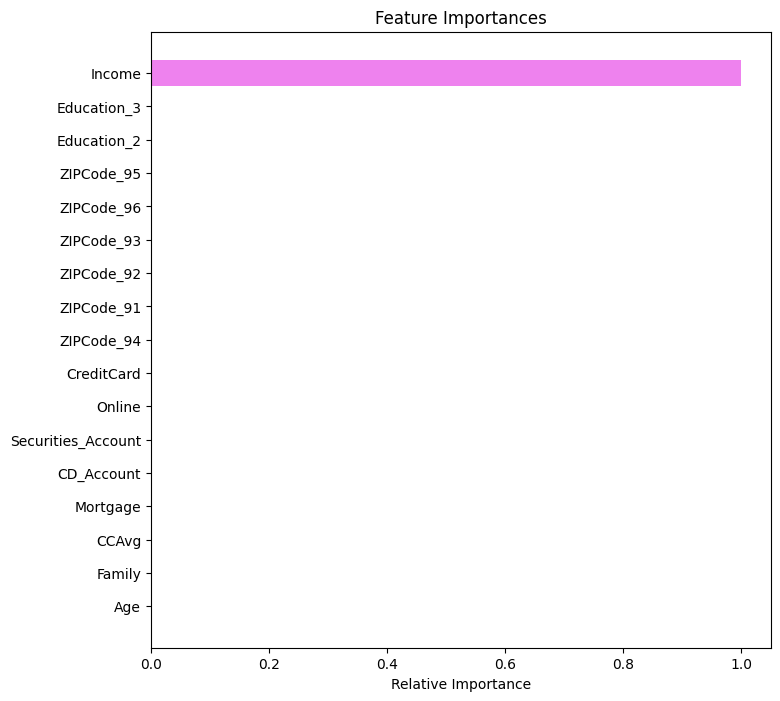

In [87]:
importances = estimator2.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [featureNamepostTrain[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

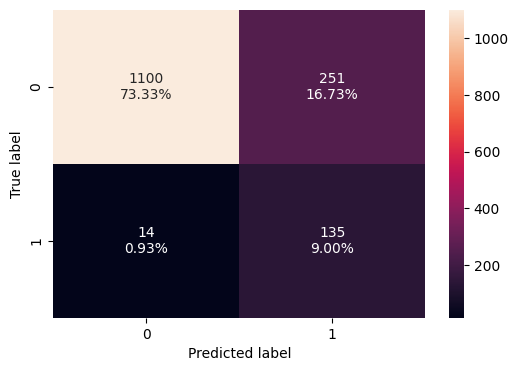

In [88]:
confustionMatrix(estimator2,X_test,y_test)

In [90]:
decisionTreePerfomancePostTest = modelPerformance(estimator2,X_test,y_test)
decisionTreePerfomancePostTest

,Accuracy,Recall,Precision,F1
0,0.823333,0.90604,0.349741,0.504673


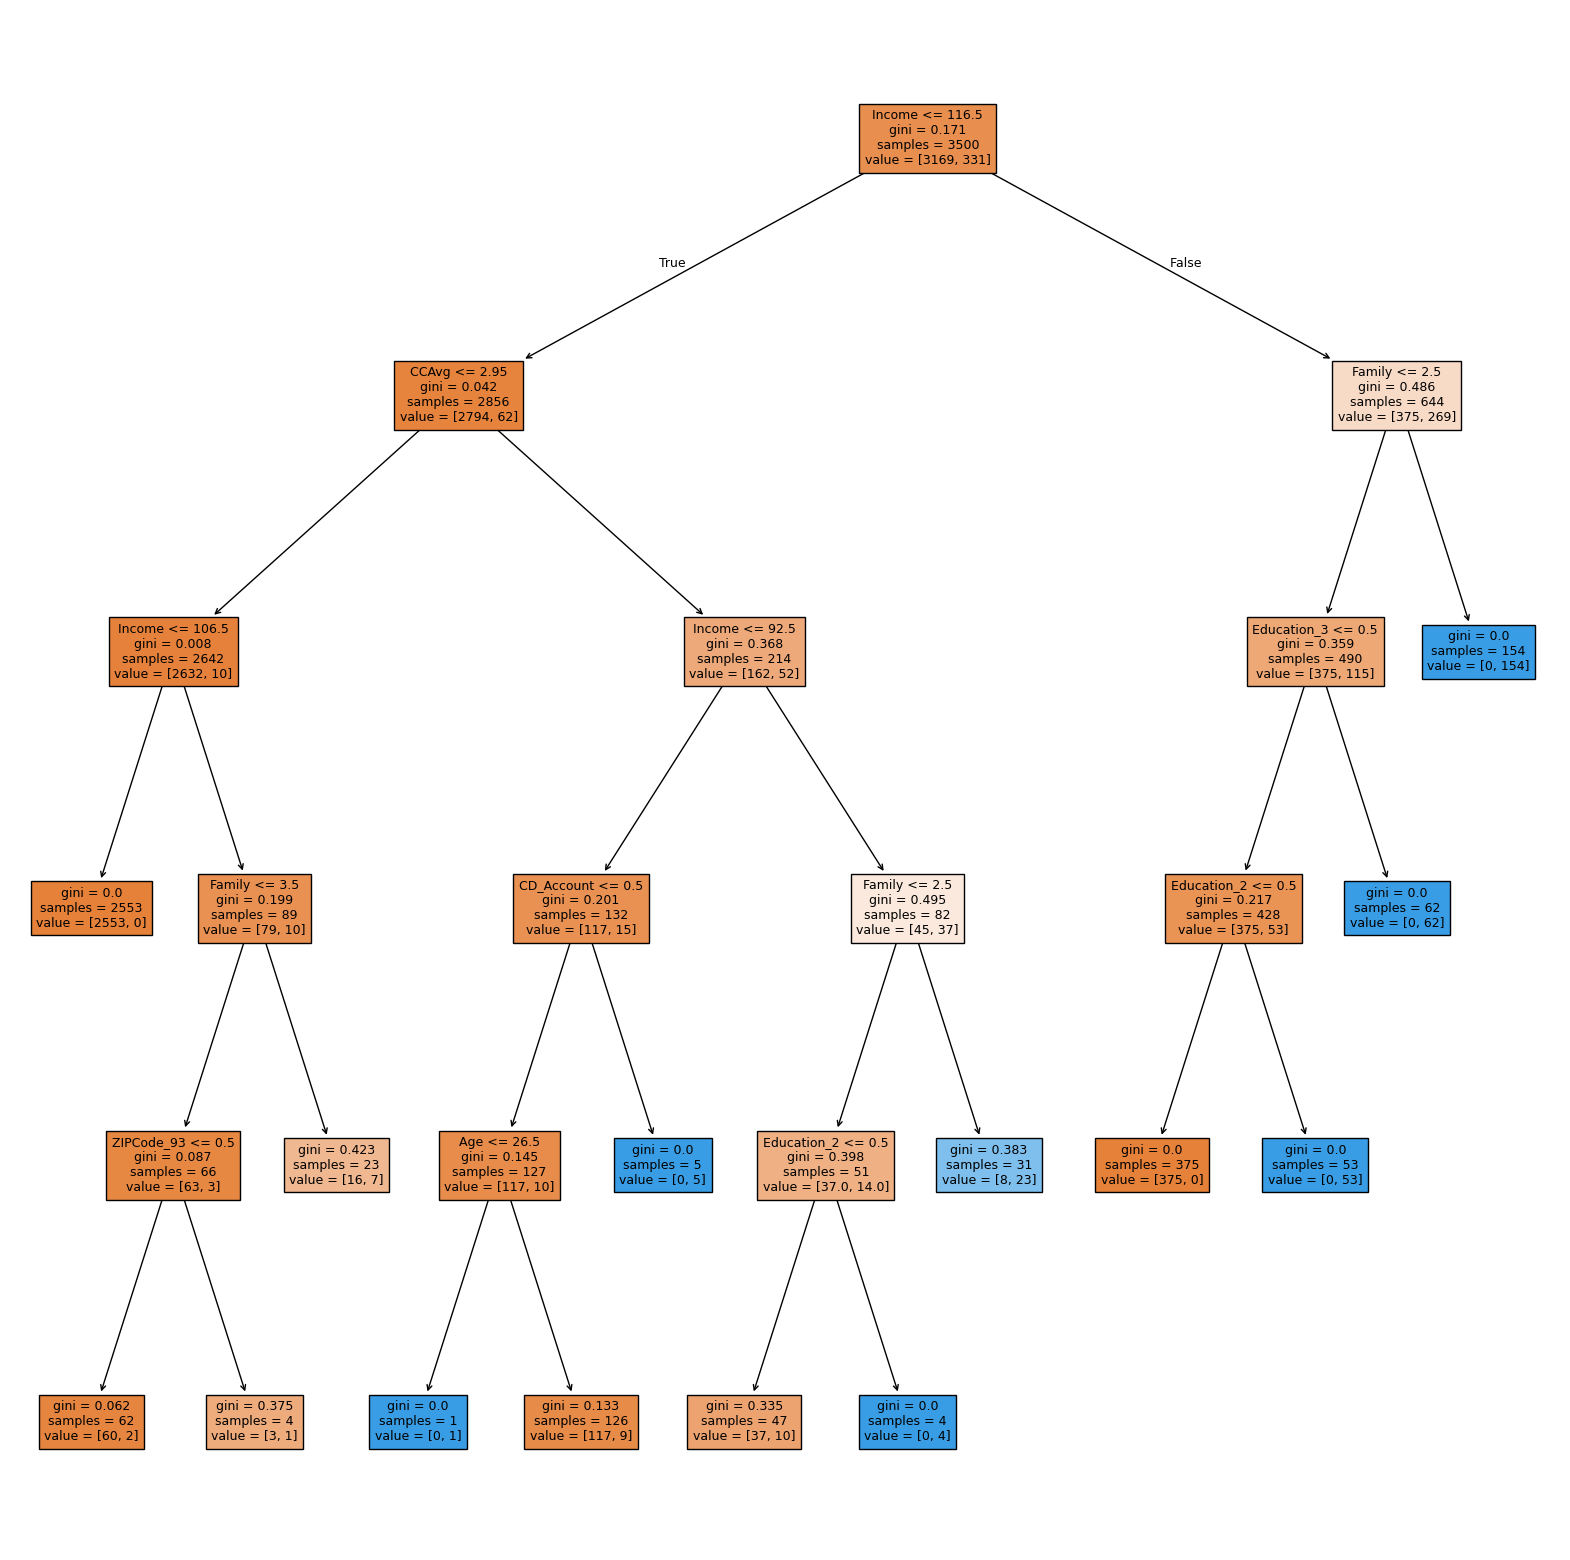

In [91]:
featureNamepostTest = list(X_test.columns)
plt.figure(figsize=(20,20))
out = tree.plot_tree(
    Dtree2,
    feature_names= featureNamepostTest,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names = None
)
for o in out:
  arrow = o.arrow_patch
  if arrow is not None:
    arrow.set_edgecolor('black')
    arrow.set_linewidth(1)
plt.show()

In [92]:
print(tree.export_text(estimator2,feature_names=featureNamepostTest,show_weights=True))

|--- Income <= 98.50
|   |--- weights: [392.70, 18.70] class: 0
|--- Income >  98.50
|   |--- weights: [82.65, 262.65] class: 1



In [93]:
print(
    pd.DataFrame(
        estimator2.feature_importances_, columns=["Imp"], index=X_test.columns
    ).sort_values(by="Imp", ascending=False)
)

                    Imp
Income              1.0
Age                 0.0
Family              0.0
CCAvg               0.0
Mortgage            0.0
Securities_Account  0.0
CD_Account          0.0
Online              0.0
CreditCard          0.0
ZIPCode_91          0.0
ZIPCode_92          0.0
ZIPCode_93          0.0
ZIPCode_94          0.0
ZIPCode_95          0.0
ZIPCode_96          0.0
Education_2         0.0
Education_3         0.0


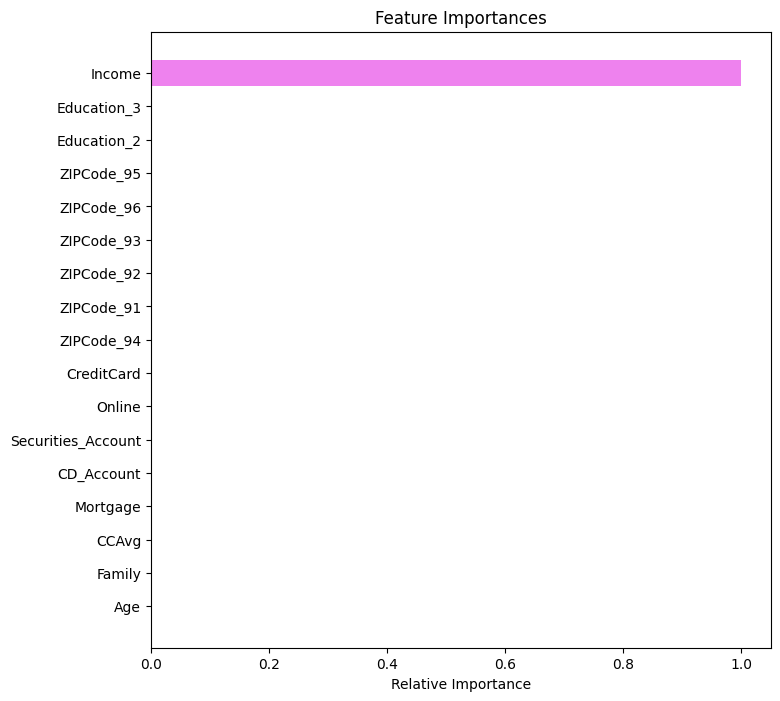

In [94]:
importances = estimator2.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [featureNamepostTest[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

## Model Performance Comparison and Final Model Selection

In [100]:
decisionTreePerfomanceTrain

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


In [102]:
models_train_comp_df = pd.concat(
    [decisionTreePerfomanceTrain.T, decisionTreePerfomancePreTrain.T, decisionTreePerfomancePostTrain.T], axis=1,
)
models_train_comp_df.columns = ["Decision Tree (sklearn default)", "Decision Tree (Pre-Pruning)", "Decision Tree (Post-Pruning)"]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree (sklearn default),Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,1.0,0.989429,0.836286
Recall,1.0,0.912387,0.933535
Precision,1.0,0.974194,0.359302
F1,1.0,0.942278,0.518892


In [112]:
models_test_comp_dfs = pd.concat(
    [decisionTreePerfomanceTest.T, decisionTreePerfomanceT2.T, decisionTreePerfomancePostTest.T], axis=1,
)
models_test_comp_dfs.columns = ["Decision Tree (sklearn default)", "Decision Tree (Pre-Pruning)", "Decision Tree (Post-Pruning)"]
print("Training performance comparison:")
models_test_comp_dfs

Training performance comparison:


,Decision Tree (sklearn default),Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,0.986000,0.984000,0.823333
Recall,0.932886,0.865772,0.906040
Precision,0.926667,0.969925,0.349741
F1,0.929766,0.914894,0.504673


## Actionable Insights and Business Recommendations


* What recommedations would you suggest to the bank?

___